In [1]:
# -*- coding: utf-8 -*-
# coding: utf-8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import missingno as msno
import os
import statsmodels.api as sm
from sklearn.metrics import auc,roc_curve
from matplotlib.font_manager import FontProperties
from sklearn import model_selection

import pandas_profiling
import warnings
warnings.filterwarnings("ignore")
get_ipython().run_line_magic('matplotlib', 'inline')
#解决中文显示问题
plt.rcParams["font.sans-serif"] = [u"SimHei"]
plt.rcParams["axes.unicode_minus"] = False
#解决图中负号问题
plt.rcParams['axes.unicode_minus']=False

In [2]:
xy_1 = pd.read_excel('d:\\上海兴业银行样本造数.xlsx' )
                     
 ##,  names = ['phonenumber', 'target','card_type','owner_city','arpu','out_prdct_fee','prdct_fee','point_fee','myth_fee','brand',
 ##         ])

In [3]:
xy_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 35 columns):
性别                  120000 non-null int64
婚姻状况                120000 non-null object
学历                  120000 non-null int64
居住情况                120000 non-null int64
社会保障                120000 non-null int64
单位性质                120000 non-null int64
所属城市级别              120000 non-null int64
客户风险承受能力等级          120000 non-null int64
年龄                  120000 non-null int64
近1个月交易次数            120000 non-null int64
近1个月笔均交易金额          120000 non-null int64
近3个月交易次数            120000 non-null int64
近3个月笔均交易金额          120000 non-null int64
近6个月交易次数            120000 non-null int64
近6个月笔均交易金额          120000 non-null int64
近12个月交易次数           120000 non-null int64
近12个月笔均交易金额         120000 non-null int64
近1个月人民币活期存款         120000 non-null int64
近3个月人民币活期存款         120000 non-null int64
近6个月人民币活期存款余额均值     120000 non-null int64
近12个月人民币活期存款余额均值    120000 non-null int64
近1个月人民

In [4]:
xy_1['target'].value_counts()

0    100000
1     20000
Name: target, dtype: int64

In [5]:
#xy_1[['学历','居住情况','社会保障','单位性质','所属城市级别','客户风险承受能力等级']] = xy_1[['学历','居住情况','社会保障','单位性质','所属城市级别','客户风险承受能力等级']].astype(str)

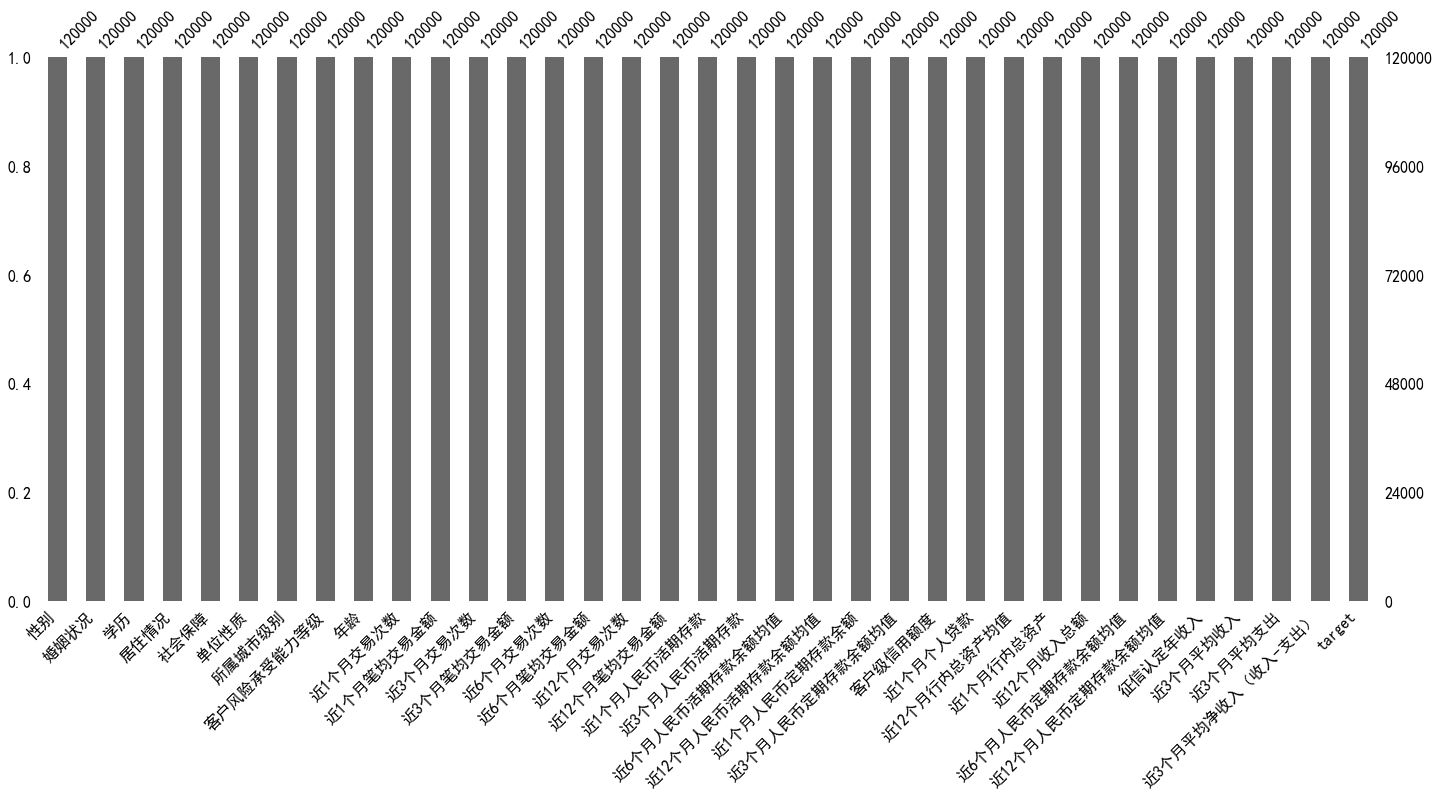

In [6]:
msno.bar(xy_1)

In [7]:
#思路： 先一个个查看类别变量，然后才是连续变量 （事实上，只要数据构造得准确，这一步不用查看了）   注意：构造的数据里估计是没有空值了，应该已经用99999 之类的 代替了

In [8]:
#建议查看各个连续型变量的分布以及可能的异常值！！！！ 

In [9]:
#xy_1['card_type'] = xy_1['card_type'].fillna(9999)  没有空值的话，这步可以省略

(array([ 991., 3868., 6351., 6197., 1198., 1219.,   39.,   41.,   41.,
          55.]),
 array([18. , 25.2, 32.4, 39.6, 46.8, 54. , 61.2, 68.4, 75.6, 82.8, 90. ]),
 <a list of 10 Patch objects>)

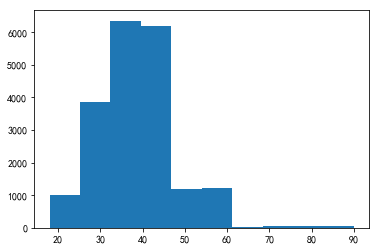

In [10]:
plt.hist(xy_1['年龄'][xy_1['target'] == 1],bins = 10)

(array([13600., 31872., 27076., 17731.,  4348.,  4456.,   243.,   217.,
          215.,   242.]),
 array([18. , 25.2, 32.4, 39.6, 46.8, 54. , 61.2, 68.4, 75.6, 82.8, 90. ]),
 <a list of 10 Patch objects>)

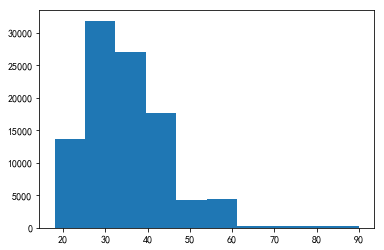

In [11]:
plt.hist(xy_1['年龄'][xy_1['target'] == 0],bins = 10)

(array([7350., 2071., 2856., 2219., 2428.,  432.,  476.,  449.,  468.,
         474.]),
 array([ 0. ,  3.1,  6.2,  9.3, 12.4, 15.5, 18.6, 21.7, 24.8, 27.9, 31. ]),
 <a list of 10 Patch objects>)

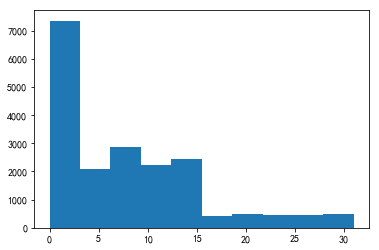

In [12]:
plt.hist(xy_1['近1个月交易次数'][(xy_1['target'] == 1)&(xy_1['近1个月交易次数'] <32)],bins = 10)

(array([64318., 10089.,  9627.,  4595.,  4675.,   923.,   888.,   932.,
          972.,   999.]),
 array([ 0. ,  3.1,  6.2,  9.3, 12.4, 15.5, 18.6, 21.7, 24.8, 27.9, 31. ]),
 <a list of 10 Patch objects>)

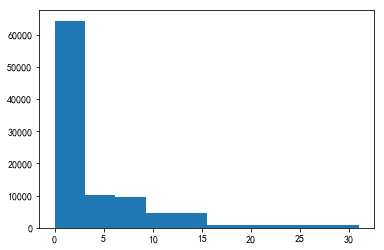

In [13]:
plt.hist(xy_1['近1个月交易次数'][(xy_1['target'] == 0)&(xy_1['近1个月交易次数'] <32)],bins = 10)

(array([7350., 2071., 2856., 2219., 2428.,  432.,  476.,  449.,  468.,
         474.]),
 array([ 0. ,  3.1,  6.2,  9.3, 12.4, 15.5, 18.6, 21.7, 24.8, 27.9, 31. ]),
 <a list of 10 Patch objects>)

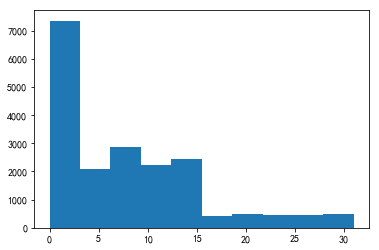

In [14]:
plt.hist(xy_1['近1个月交易次数'][(xy_1['target'] == 1)&(xy_1['近1个月交易次数'] <32)],bins = 10)

(array([3811., 6320., 3809., 1368.,   81.,  100.,  104.,  101.,   99.,
         107.]),
 array([   0. ,  299.9,  599.8,  899.7, 1199.6, 1499.5, 1799.4, 2099.3,
        2399.2, 2699.1, 2999. ]),
 <a list of 10 Patch objects>)

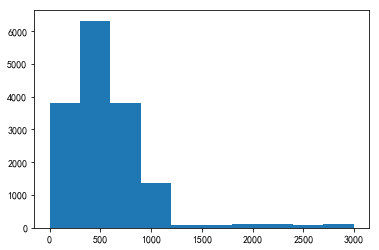

In [15]:
plt.hist(xy_1['近1个月笔均交易金额'][(xy_1['近1个月笔均交易金额'] <3000)&(xy_1['target'] == 1)],bins = 10)

(array([24878., 39334., 12622.,  4435.,   388.,   389.,   415.,   394.,
          420.,   406.]),
 array([   0. ,  299.9,  599.8,  899.7, 1199.6, 1499.5, 1799.4, 2099.3,
        2399.2, 2699.1, 2999. ]),
 <a list of 10 Patch objects>)

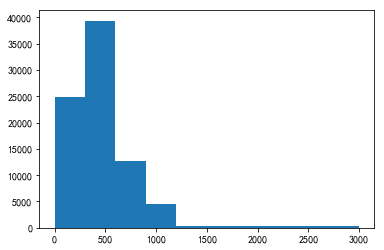

In [16]:
plt.hist(xy_1['近1个月笔均交易金额'][(xy_1['近1个月笔均交易金额'] <3000)&(xy_1['target'] == 0)],bins = 10)

(array([ 763., 1524., 1147.,  959.,  919.,  901.,  563.,  464.,  468.,
         459.]),
 array([ 4005. ,  6604.3,  9203.6, 11802.9, 14402.2, 17001.5, 19600.8,
        22200.1, 24799.4, 27398.7, 29998. ]),
 <a list of 10 Patch objects>)

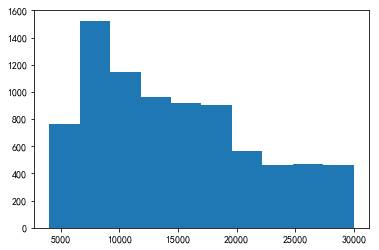

In [17]:
plt.hist(xy_1['客户级信用额度'][(xy_1['客户级信用额度'] <30000)&(xy_1['target'] == 1)],bins = 10)

(array([11533., 13277.,  7392.,  1408.,  1445.,  1352.,   704.,   173.,
          179.,   185.]),
 array([ 2000. ,  4799.8,  7599.6, 10399.4, 13199.2, 15999. , 18798.8,
        21598.6, 24398.4, 27198.2, 29998. ]),
 <a list of 10 Patch objects>)

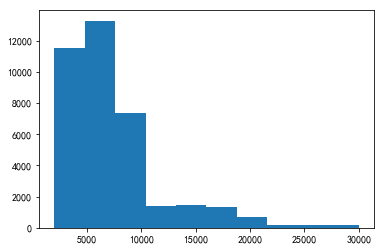

In [18]:
plt.hist(xy_1['客户级信用额度'][(xy_1['客户级信用额度'] <30000)&(xy_1['target'] == 0)],bins = 10)

In [19]:
xy_1_positive = xy_1[xy_1['target'] == 1]
xy_1_random = xy_1[xy_1['target'] == 0]

In [20]:
xy_1_positive.describe()

,性别,学历,居住情况,社会保障,单位性质,所属城市级别,客户风险承受能力等级,年龄,近1个月交易次数,近1个月笔均交易金额,...,近12个月行内总资产均值,近1个月行内总资产,近12个月收入总额,近6个月人民币定期存款余额均值,近12个月人民币定期存款余额均值,征信认定年收入,近3个月平均收入,近3个月平均支出,近3个月平均净收入（收入-支出）,target
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,...,2.000000e+04,2.000000e+04,2.000000e+04,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.0
mean,0.316750,4.719000,4.688000,0.898000,3.516000,2.474050,2.145100,38.608550,14.31270,5937.252450,...,3.096642e+05,3.042801e+05,1.336061e+05,169802.563950,176922.705700,2.376478e+08,26786.109150,2271.366550,12424.355650,1.0
std,0.465221,1.266538,1.084304,0.302656,2.783636,1.521822,1.052189,9.092038,34.60163,17006.793859,...,8.250731e+05,8.870099e+05,2.284119e+05,231338.046486,243544.743694,4.254210e+08,64018.374755,2698.267028,24494.029474,0.0
min,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,18.000000,0.00000,0.000000,...,2.600000e+01,2.300000e+01,1.000000e+00,0.000000,6.000000,1.080000e+02,2.000000,0.000000,0.000000,1.0
25%,0.000000,4.000000,4.000000,1.000000,2.000000,1.000000,1.000000,33.000000,2.00000,345.000000,...,9.658450e+04,6.141900e+04,6.301700e+04,46241.000000,50891.250000,1.042032e+05,7674.750000,1295.000000,5502.500000,1.0
50%,0.000000,5.000000,5.000000,1.000000,2.000000,2.000000,2.000000,38.000000,7.00000,588.000000,...,1.538930e+05,1.306980e+05,1.005445e+05,75576.500000,75864.000000,1.725835e+05,12059.000000,1992.000000,9692.000000,1.0
75%,1.000000,6.000000,5.000000,1.000000,6.000000,4.000000,3.000000,43.000000,13.00000,981.250000,...,2.755435e+05,2.755522e+05,1.538580e+05,143306.000000,147571.500000,9.721665e+05,19872.250000,2719.000000,14083.000000,1.0
max,1.000000,8.000000,7.000000,1.000000,11.000000,7.000000,5.000000,90.000000,300.00000,99910.000000,...,9.954344e+06,9.989393e+06,3.597380e+06,1000000.000000,1000000.000000,1.000000e+09,498786.000000,34890.000000,398216.000000,1.0


In [21]:
xy_1_random.describe()

,性别,学历,居住情况,社会保障,单位性质,所属城市级别,客户风险承受能力等级,年龄,近1个月交易次数,近1个月笔均交易金额,...,近12个月行内总资产均值,近1个月行内总资产,近12个月收入总额,近6个月人民币定期存款余额均值,近12个月人民币定期存款余额均值,征信认定年收入,近3个月平均收入,近3个月平均支出,近3个月平均净收入（收入-支出）,target
count,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.0
mean,0.440000,4.270000,4.110000,0.70000,4.010000,2.950000,2.420000,34.921830,7.933750,4837.862360,...,2.519254e+05,1.822071e+05,1.138762e+05,141193.967840,142636.856360,2.401866e+08,14050.258820,1843.996020,11157.323620,0.0
std,0.496389,1.599101,1.522473,0.45826,2.692577,1.745718,1.305227,9.687653,25.515572,15442.380145,...,8.510043e+05,6.065288e+05,2.171759e+05,212917.359361,211602.746019,4.269808e+08,30112.649975,2057.396108,24369.860148,0.0
min,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,1.000000,18.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,7.000000e+00,1.000000,0.000000,9.000000e+00,0.000000,0.000000,0.000000,0.0
25%,0.000000,4.000000,3.000000,0.00000,2.000000,1.750000,1.000000,28.000000,2.000000,300.000000,...,3.960150e+04,2.661375e+04,5.458100e+04,38058.000000,44391.750000,7.854025e+04,7430.000000,1250.000000,5265.000000,0.0
50%,0.000000,4.000000,3.500000,1.00000,3.000000,2.500000,2.000000,34.000000,3.000000,443.000000,...,1.112450e+05,1.049440e+05,7.315100e+04,67024.500000,68953.000000,1.465515e+05,9570.000000,1500.000000,7470.000000,0.0
75%,1.000000,5.000000,5.000000,1.00000,6.000000,4.000000,3.000000,40.000000,7.000000,858.000000,...,1.622955e+05,1.467105e+05,1.174540e+05,122294.250000,121535.250000,9.999092e+05,15000.000000,2000.000000,12000.000000,0.0
max,1.000000,9.000000,7.000000,1.00000,11.000000,7.000000,5.000000,90.000000,300.000000,99999.000000,...,9.995007e+06,9.982671e+06,3.596114e+06,1000000.000000,1000000.000000,1.000000e+09,499733.000000,34990.000000,399878.000000,0.0


In [22]:
xy_1.describe()

,性别,学历,居住情况,社会保障,单位性质,所属城市级别,客户风险承受能力等级,年龄,近1个月交易次数,近1个月笔均交易金额,...,近12个月行内总资产均值,近1个月行内总资产,近12个月收入总额,近6个月人民币定期存款余额均值,近12个月人民币定期存款余额均值,征信认定年收入,近3个月平均收入,近3个月平均支出,近3个月平均净收入（收入-支出）,target
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,...,1.200000e+05,1.200000e+05,1.200000e+05,120000.000000,120000.000000,1.200000e+05,120000.000000,120000.000000,120000.000000,120000.000000
mean,0.419458,4.344833,4.206333,0.733000,3.927667,2.870675,2.374183,35.536283,8.996908,5021.094042,...,2.615485e+05,2.025526e+05,1.171645e+05,145962.067192,148351.164583,2.397635e+08,16172.900542,1915.224442,11368.495625,0.166667
std,0.493472,1.557651,1.474430,0.442394,2.714206,1.719605,1.270702,9.688831,27.344558,15719.201344,...,8.470075e+05,6.631434e+05,2.192110e+05,216358.399604,217627.133702,4.267205e+08,38225.649742,2183.151620,24395.067022,0.372680
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,18.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,9.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,3.000000,0.000000,2.000000,1.000000,1.000000,28.000000,2.000000,305.000000,...,4.670525e+04,2.966000e+04,5.538450e+04,39353.000000,45515.500000,8.130725e+04,7457.000000,1254.000000,5291.000000,0.000000
50%,0.000000,4.000000,4.000000,1.000000,3.000000,2.000000,2.000000,34.000000,3.000000,456.000000,...,1.166330e+05,1.085340e+05,7.630700e+04,68313.000000,69940.500000,1.538870e+05,9766.000000,1552.000000,7663.500000,0.000000
75%,1.000000,5.000000,5.000000,1.000000,6.000000,4.000000,3.000000,41.000000,8.000000,886.000000,...,1.987912e+05,1.604795e+05,1.274522e+05,126219.250000,126517.500000,9.962612e+05,15714.000000,2165.000000,12513.000000,0.000000
max,1.000000,9.000000,7.000000,1.000000,11.000000,7.000000,5.000000,90.000000,300.000000,99999.000000,...,9.995007e+06,9.989393e+06,3.597380e+06,1000000.000000,1000000.000000,1.000000e+09,499733.000000,34990.000000,399878.000000,1.000000


In [23]:
xy_1.describe(include=['O'])

,婚姻状况
count,120000
unique,5
top,M
freq,51080


In [24]:
xy_1['客户风险承受能力等级'].value_counts() 

1    39609
2    29682
3    26326
4    14964
5     9419
Name: 客户风险承受能力等级, dtype: int64

In [25]:
 xy_1['近1个月个人贷款'].value_counts()

0          39085
24424         19
22042         18
22407         18
21973         16
21091         16
24886         16
23426         16
23479         16
22068         16
23388         16
20392         16
24803         15
21345         15
24298         15
22024         15
21029         15
21994         15
21477         15
23543         15
24113         15
20763         15
24594         15
24074         14
23127         14
21512         14
21545         14
22115         14
22971         14
23204         14
           ...  
467139         1
69829          1
84174          1
121052         1
416161         1
283687         1
38007          1
2278           1
231            1
30952          1
45297          1
41203          1
39156          1
33015          1
47408          1
59642          1
53501          1
76034          1
329990         1
196871         1
90379          1
86285          1
3516677        1
82191          1
106771         1
8483           1
32078          1
31016         

In [26]:
xy_1['客户级信用额度'].value_counts()

999999999    67183
5641            18
4748            18
4907            17
4554            17
4287            16
5672            16
5490            16
4361            16
5804            16
4548            15
5716            15
4859            15
5011            15
5338            15
5277            15
4635            15
5271            15
4663            15
5841            14
5608            14
5916            14
4633            14
5424            14
4448            14
5976            14
4550            14
5780            14
4141            14
5561            14
             ...  
46462            1
48511            1
43170            1
29654            1
25556            1
39330            1
33928            1
19729            1
25956            1
17680            1
46350            1
159188           1
408799           1
13534            1
11485            1
17760            1
7387             1
134361           1
44237            1
49577            1
38090            1
333908      

In [27]:
len(xy_1.columns)

35

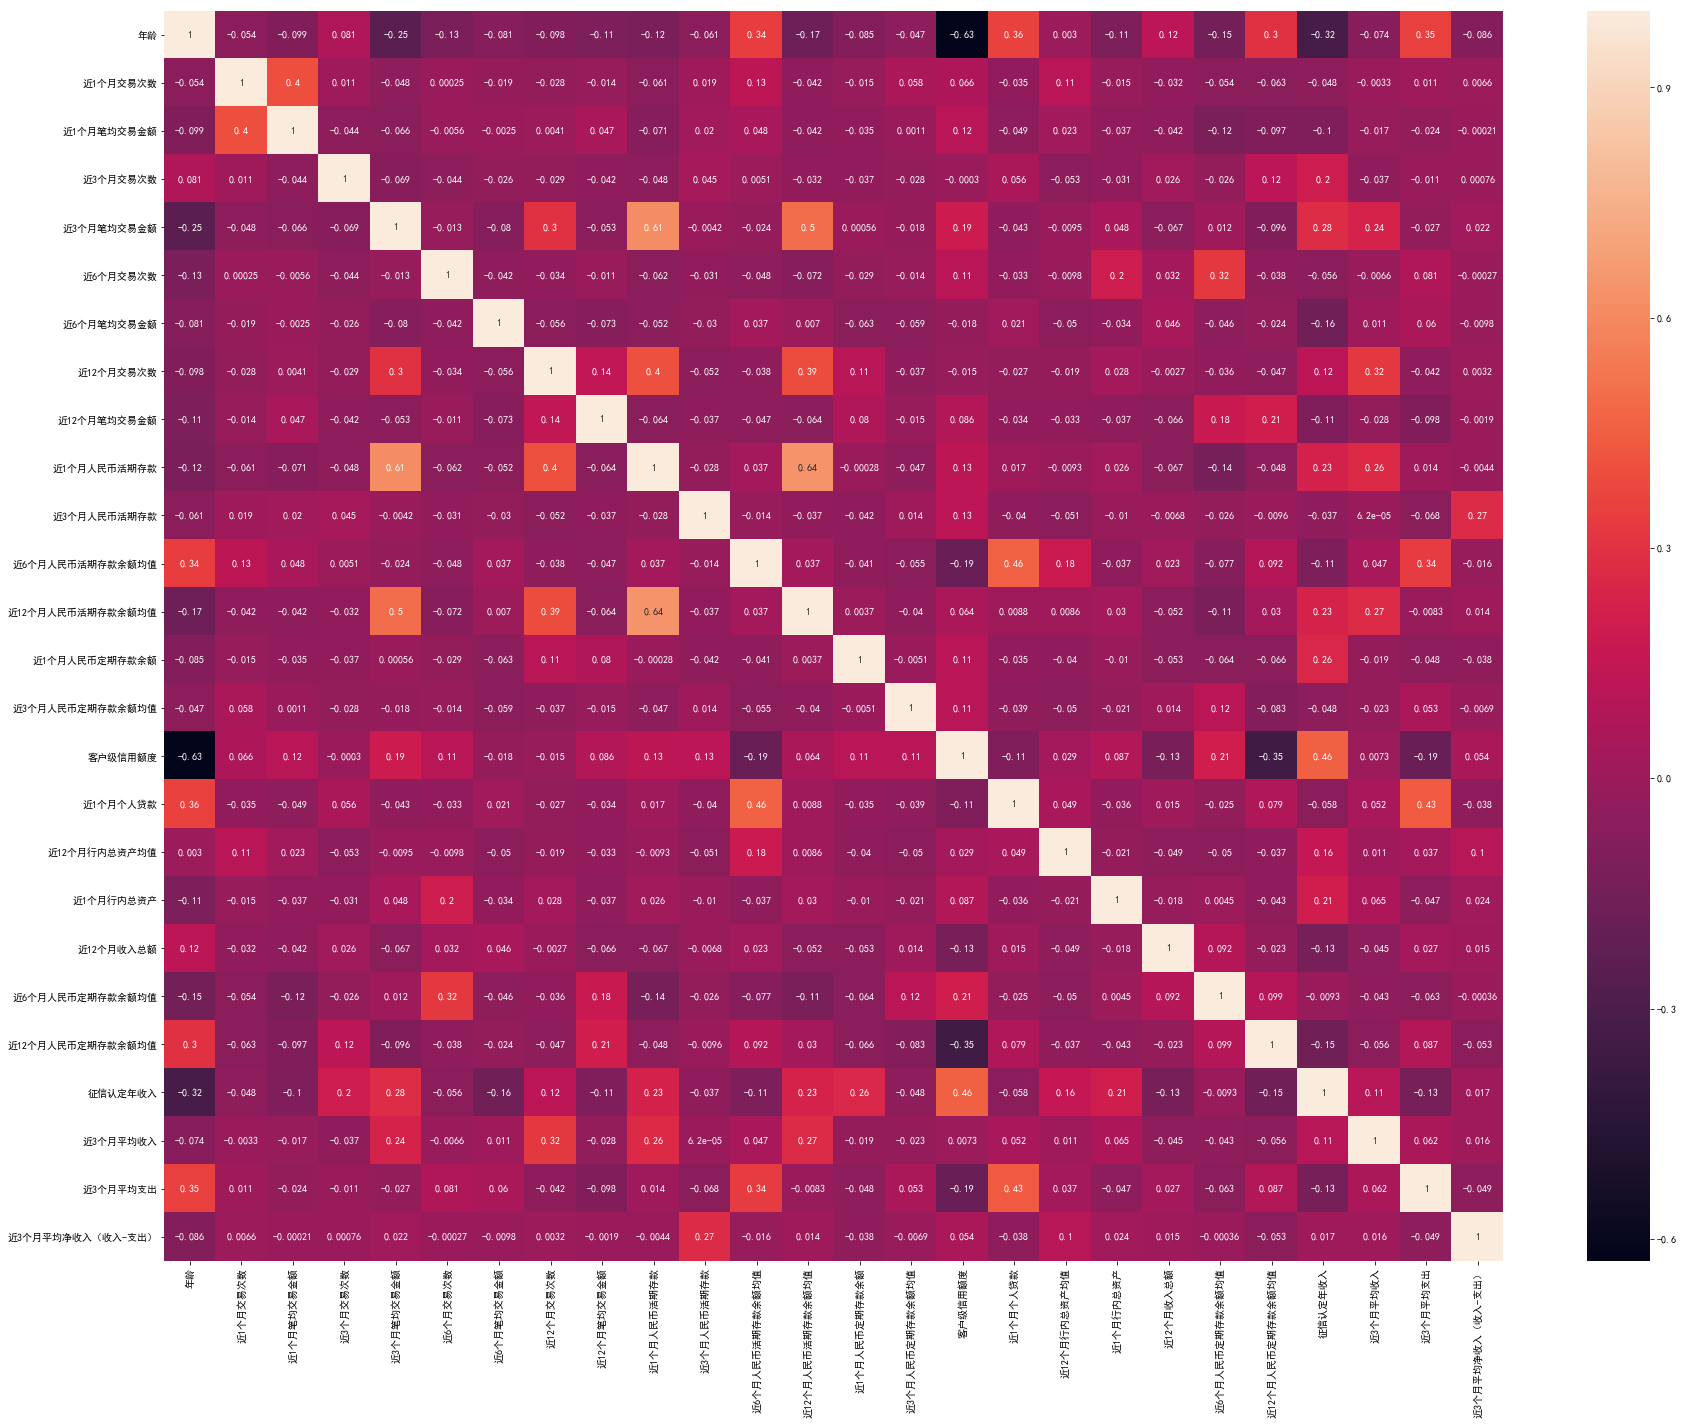

In [28]:
# 查看各连续型变量的相关性
xy_continuous = xy_1[['年龄', '近1个月交易次数', '近1个月笔均交易金额', '近3个月交易次数', '近3个月笔均交易金额', '近6个月交易次数',
       '近6个月笔均交易金额', '近12个月交易次数', '近12个月笔均交易金额', '近1个月人民币活期存款', '近3个月人民币活期存款',
       '近6个月人民币活期存款余额均值', '近12个月人民币活期存款余额均值', '近1个月人民币定期存款余额',
       '近3个月人民币定期存款余额均值', '客户级信用额度', '近1个月个人贷款', '近12个月行内总资产均值', '近1个月行内总资产',
       '近12个月收入总额', '近6个月人民币定期存款余额均值', '近12个月人民币定期存款余额均值', '征信认定年收入',
       '近3个月平均收入', '近3个月平均支出', '近3个月平均净收入（收入-支出）']]
xy_corr = xy_continuous.corr()
plt.figure(figsize = (30,23))
sns.heatmap(xy_corr,annot=True)

In [29]:
np.where((xy_corr > 0.75)&(xy_corr < 1))

(array([], dtype=int64), array([], dtype=int64))

In [30]:
np.where((xy_corr < - 0.68))

(array([], dtype=int64), array([], dtype=int64))

In [31]:
#要把训练集和测试集分开  建议按9:1的比例
x_columns = xy_1.drop(['target'], axis = 1)
x_train, x_test, y_train, y_test = model_selection.train_test_split( x_columns, xy_1['target'], test_size=0.1, random_state=42)

In [32]:
#x_train

In [33]:
#y_train

In [34]:
xy_6 = pd.concat([y_train,x_train], axis =1)


In [35]:
#对连续型变量做遍历版分箱
xy_6_duplicates = xy_6.copy()

def column_binning(data):
    xy_101 = data
    column_list = ['年龄', '近1个月交易次数', '近1个月笔均交易金额', '近3个月交易次数', '近3个月笔均交易金额', '近6个月交易次数',
       '近6个月笔均交易金额', '近12个月交易次数', '近12个月笔均交易金额', '近1个月人民币活期存款', '近3个月人民币活期存款',
       '近6个月人民币活期存款余额均值', '近12个月人民币活期存款余额均值', '近1个月人民币定期存款余额',
       '近3个月人民币定期存款余额均值', '客户级信用额度', '近1个月个人贷款', '近12个月行内总资产均值', '近1个月行内总资产',
       '近12个月收入总额', '近6个月人民币定期存款余额均值', '近12个月人民币定期存款余额均值', '征信认定年收入',
       '近3个月平均收入', '近3个月平均支出', '近3个月平均净收入（收入-支出）']    
    for column in column_list:
        xy_101.insert(2,column+'_derive_1',xy_101[column])
        xy_71 = xy_101[xy_101[column+'_derive_1'] == 999999999 ]    # | (xy_101[column+'_derive_1'] == 0)
        xy_81= xy_101[xy_101[column+'_derive_1'] < 999999999]      ##  (0<xy_101[column+'_derive_1'])&(
        xy_81[column+'_derive_1'] = pd.qcut(xy_81[column+'_derive_1'],8, duplicates='drop')
        xy_91 = pd.concat([xy_81,xy_71],axis = 0)
        xy_101 = xy_91
    return xy_91
xy_99=column_binning(xy_6_duplicates)

In [36]:
column_list = ['年龄', '近1个月交易次数', '近1个月笔均交易金额', '近3个月交易次数', '近3个月笔均交易金额', '近6个月交易次数',
       '近6个月笔均交易金额', '近12个月交易次数', '近12个月笔均交易金额', '近1个月人民币活期存款', '近3个月人民币活期存款',
       '近6个月人民币活期存款余额均值', '近12个月人民币活期存款余额均值', '近1个月人民币定期存款余额',
       '近3个月人民币定期存款余额均值', '客户级信用额度', '近1个月个人贷款', '近12个月行内总资产均值', '近1个月行内总资产',
       '近12个月收入总额', '近6个月人民币定期存款余额均值', '近12个月人民币定期存款余额均值', '征信认定年收入',
       '近3个月平均收入', '近3个月平均支出', '近3个月平均净收入（收入-支出）']  
for n,i in enumerate(column_list):
    print (xy_99[i+'_derive_1'].value_counts())
    xy_1_cat_num = xy_99[i+'_derive_1'].value_counts().index.shape[0]
    print('{0}.{1}特征的类型数量是：{2}; 总数量是：{3}'.format(n+1,i,xy_1_cat_num, len(xy_99[i+'_derive_1'].tolist())))

(17.999, 26.0]    17688
(34.0, 37.0]      14529
(41.0, 45.0]      13998
(26.0, 29.0]      13936
(31.0, 34.0]      13469
(37.0, 41.0]      13297
(45.0, 90.0]      11823
(29.0, 31.0]       9260
Name: 年龄_derive_1, dtype: int64
1.年龄特征的类型数量是：8; 总数量是：108000
(1.0, 2.0]       23046
(-0.001, 1.0]    23018
(2.0, 3.0]       18377
(4.0, 8.0]       16544
(13.0, 300.0]    13150
(8.0, 13.0]      10239
(3.0, 4.0]        3626
Name: 近1个月交易次数_derive_1, dtype: int64
2.近1个月交易次数特征的类型数量是：7; 总数量是：108000
(-0.001, 196.0]        13545
(196.0, 305.0]         13539
(611.0, 885.0]         13513
(6142.125, 99999.0]    13500
(455.0, 611.0]         13495
(885.0, 6142.125]      13485
(379.0, 455.0]         13476
(305.0, 379.0]         13447
Name: 近1个月笔均交易金额_derive_1, dtype: int64
3.近1个月笔均交易金额特征的类型数量是：8; 总数量是：108000
(-0.001, 3.0]     18758
(3.0, 6.0]        16249
(18.0, 25.0]      14005
(11.0, 18.0]      13271
(44.0, 1000.0]    13135
(8.0, 11.0]       12224
(25.0, 44.0]      12130
(6.0, 8.0]         8228
Name: 近3个月交易次数_

In [37]:
wd_loan_basic_df=xy_99
interval_list = [ i+'_derive_1' for i in column_list]

ClassifyColumnList=['性别', '婚姻状况', '学历', '居住情况', '社会保障', '单位性质', '所属城市级别', '客户风险承受能力等级']

In [38]:
interval_list

['年龄_derive_1',
 '近1个月交易次数_derive_1',
 '近1个月笔均交易金额_derive_1',
 '近3个月交易次数_derive_1',
 '近3个月笔均交易金额_derive_1',
 '近6个月交易次数_derive_1',
 '近6个月笔均交易金额_derive_1',
 '近12个月交易次数_derive_1',
 '近12个月笔均交易金额_derive_1',
 '近1个月人民币活期存款_derive_1',
 '近3个月人民币活期存款_derive_1',
 '近6个月人民币活期存款余额均值_derive_1',
 '近12个月人民币活期存款余额均值_derive_1',
 '近1个月人民币定期存款余额_derive_1',
 '近3个月人民币定期存款余额均值_derive_1',
 '客户级信用额度_derive_1',
 '近1个月个人贷款_derive_1',
 '近12个月行内总资产均值_derive_1',
 '近1个月行内总资产_derive_1',
 '近12个月收入总额_derive_1',
 '近6个月人民币定期存款余额均值_derive_1',
 '近12个月人民币定期存款余额均值_derive_1',
 '征信认定年收入_derive_1',
 '近3个月平均收入_derive_1',
 '近3个月平均支出_derive_1',
 '近3个月平均净收入（收入-支出）_derive_1']

In [39]:
# 将区间值列的中间对应值：
intervalcolumn_df={}
def ConverIntervalData():
    for intervalcolumn in interval_list:
        wd_loan_basic_df[intervalcolumn]=wd_loan_basic_df[intervalcolumn].astype('str')
        intervalunique=wd_loan_basic_df[intervalcolumn].unique()
        #print(intervalunique)
        intervalcolumn_df[intervalcolumn]={'intervaluniquelist':[]}
        intervalcolumn_df[intervalcolumn]['intervaluniquelist']=intervalunique
        intervalcolumn_df[intervalcolumn]['intervalValueDict']={}
        for intervalValue in intervalunique:
            intervalLeft=0.0
            intervalRight=0.0
            #print(intervalValue)
            if ', ' in intervalValue:
                intervalValueSplit=intervalValue.split(', ')
                intervalLeft=float(intervalValueSplit[0].split('(')[1])
                intervalRight=float(intervalValueSplit[1].split(']')[0])
                #print(intervalValueSplit,intervalLeft,intervalRight)
                intervalcolumn_df[intervalcolumn]['intervalValueDict'][intervalValue]=(intervalRight+intervalLeft)/2
            else:
                intervalLeft=float(intervalValue)
                intervalRight=float(intervalValue)
                intervalcolumn_df[intervalcolumn]['intervalValueDict'][intervalValue]=(intervalRight+intervalLeft)/2
        
        intervalcolumnAvg=[]
        for intervalValuekey in intervalcolumn_df[intervalcolumn]['intervalValueDict']:
            intervalcolumnAvg.append(intervalcolumn_df[intervalcolumn]['intervalValueDict'][intervalValuekey])
        intervalcolumnAvg=np.array(intervalcolumnAvg)
        intervalcolumnAvgSortIndex=intervalcolumnAvg.argsort()
    #    print (intervalcolumn_df[intervalcolumn]['intervalValueDict'])
     ###   if  (intervalcolumn != 'listing_data_months_derive_1') and (intervalcolumn != 'credit_limit_derive_1') and (intervalcolumn != 'credit_payment_avg_derive_1'):
        maxpointvalue2=(intervalcolumnAvg[intervalcolumnAvgSortIndex[-2]]-intervalcolumnAvg[intervalcolumnAvgSortIndex[-3]])*2+intervalcolumnAvg[intervalcolumnAvgSortIndex[-2]]
        intervalcolumn_df[intervalcolumn]['intervalValueDict']['999999999']=maxpointvalue2    
        
        #print(intervalcolumnAvg,maxpointvalue)  
     #   print (intervalcolumn_df[intervalcolumn]['intervalValueDict'])
ConverIntervalData() 

In [40]:
# 将interval 列的数据进行替换操作：
def ReplaceIntervalColumnValue():
    for intervalcolumn in interval_list:
        wd_loan_basic_df[intervalcolumn].replace(intervalcolumn_df[intervalcolumn]['intervalValueDict'],inplace=True)
        #print(a.head(10),ChuanQi_basic_df[intervalcolumn].head(10))
ReplaceIntervalColumnValue()


def ClassifyFeedBack(classifycolumnlist,origindf):
    columnvaluecount_dict={}
    for classifycolumn in classifycolumnlist:
        columngroupvaluecount=origindf.groupby('target')[classifycolumn].value_counts()
        columnvaluecount=origindf[classifycolumn].value_counts()
        if classifycolumn not in columnvaluecount_dict:            
            columnvaluecount_dict[classifycolumn]={}
            columnvaluecount_dict[classifycolumn]['target_group']=columngroupvaluecount
        columnvaluecount_dict[classifycolumn]['columnvaluecount']=columnvaluecount
    return columnvaluecount_dict  

all_columns = interval_list + ClassifyColumnList
columnvaluecount_dict=ClassifyFeedBack(all_columns,wd_loan_basic_df)

In [41]:
# 写个程序检索columnvaluecount_dict 中的不同分类列是否数据一致且要保证相同的特征的不同分区都必须要有覆盖，防止分区为空，或者人数为零·
def checkmatchCGVC_dict(columnvaluecount_dict):
    for column in columnvaluecount_dict:
        ColumnAllGroupsIndex=columnvaluecount_dict[column]['columnvaluecount'].index
        TureSampleGroupsIndex=columnvaluecount_dict[column]['target_group'][1].index
        for GroupsIndex in ColumnAllGroupsIndex:
            if GroupsIndex not in TureSampleGroupsIndex: 
                if GroupsIndex not in columnvaluecount_dict[column]['target_group'][1].index:
                    columnvaluecount_dict[column]['target_group'][1,GroupsIndex]=0.00001

    return columnvaluecount_dict
columnvaluecount_dict=checkmatchCGVC_dict(columnvaluecount_dict)

In [42]:
# 计算各分区内（或各个类别）正样本的反馈率
import numpy as np
def CalculateTurnSampleFeedBack(columnvaluecount_dict):
    for column in columnvaluecount_dict:
        columnvaluecount_dict[column]['TurnSampleFeedBack']=columnvaluecount_dict[column]['target_group'][1]/columnvaluecount_dict[column]['columnvaluecount']
        columnvaluecount_dict[column]['TurnSampleLogPercentRadio']=np.log(columnvaluecount_dict[column]['TurnSampleFeedBack']/(1-columnvaluecount_dict[column]['TurnSampleFeedBack']))
    return columnvaluecount_dict
columnvaluecount_dict=CalculateTurnSampleFeedBack(columnvaluecount_dict)

In [43]:
# 对不同基础属性的类别值（分区）计算row_percent
def CalculateColumnRowPercent(columnvaluecount_dict):
    for column in columnvaluecount_dict:
        columnvaluecount_dict[column]['ColumnRowPercent']=columnvaluecount_dict[column]['columnvaluecount']/columnvaluecount_dict[column]['columnvaluecount'].sum()
    return columnvaluecount_dict
columnvaluecount_dict=CalculateColumnRowPercent(columnvaluecount_dict)

In [44]:
# 将每个列的反馈率数值及覆盖率值输出出来
def CreateColumnStatistics(columnvaluecount_dict):
    for column in columnvaluecount_dict:
        columnvaluecount_dict[column]['ColumnStatistics']=pd.DataFrame({'RowPercent':columnvaluecount_dict[column]['TurnSampleFeedBack'],'Percent':columnvaluecount_dict[column]['ColumnRowPercent']})   
    return columnvaluecount_dict
columnvaluecount_dict=CreateColumnStatistics(columnvaluecount_dict)

In [45]:
#输出类别变量的反馈率及覆盖率：

# writer = pd.ExcelWriter('兴业理财模型类别变量反馈率统计_20200108下午-new.xlsx')

# for ClassifyColumn in ClassifyColumnList:

#     columnvaluecount_dict[ClassifyColumn]['ColumnStatistics'].to_excel(excel_writer=writer, sheet_name=ClassifyColumn, encoding="utf-8")
# ##    print(ClassifyColumn,columnvaluecount_dict[ClassifyColumn]['ColumnStatistics'])
# writer.save()
# writer.close()

In [46]:
# # #输出类别变量的反馈率及覆盖率：

# writer = pd.ExcelWriter('兴业理财模型连续变量反馈率统计_20200108下午.xlsx')

# for ClassifyColumn in interval_list:

#     columnvaluecount_dict[ClassifyColumn]['ColumnStatistics'].to_excel(excel_writer=writer, sheet_name=ClassifyColumn, encoding="utf-8")
# ##    print(ClassifyColumn,columnvaluecount_dict[ClassifyColumn]['ColumnStatistics'])
# writer.save()
# writer.close()

近1个月交易次数_derive_1           近1个月交易次数_derive_1
0.4995            -2.178444
1.5000            -2.224816
2.5000            -2.140309
3.5000            -1.590365
6.0000            -1.440362
10.5000           -0.707686
156.5000          -0.740871
近1个月笔均交易金额_derive_1             近1个月笔均交易金额_derive_1
97.9995               -1.897601
250.5000              -1.872569
342.0000              -1.932296
417.0000              -1.980622
533.0000              -1.598893
748.0000              -1.178050
3513.5625             -1.297805
53070.5625            -1.394649
近3个月交易次数_derive_1           近3个月交易次数_derive_1
1.4995            -2.429122
4.5000            -1.931430
7.0000            -1.877142
9.5000            -1.936222
14.5000           -2.102191
21.5000           -1.987436
34.5000           -0.595387
522.0000          -0.728069
近3个月笔均交易金额_derive_1             近3个月笔均交易金额_derive_1
104.9995              -1.825917
265.0000              -1.821589
355.0000              -2.079193
425.0000              -2.078019


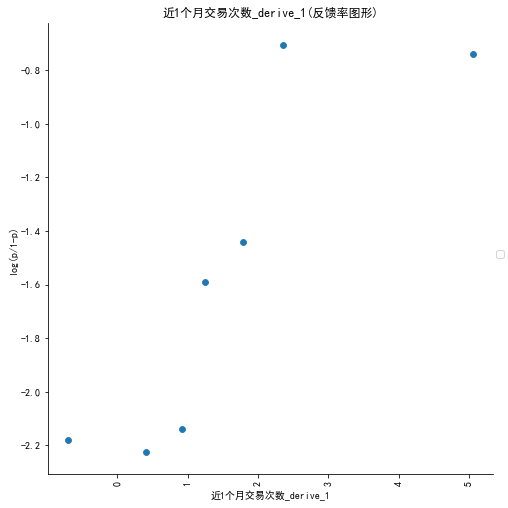

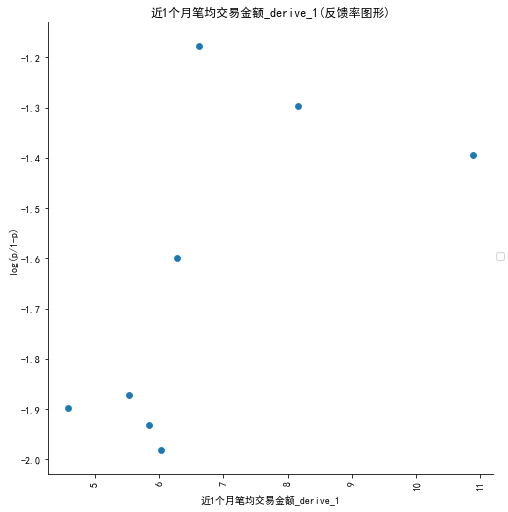

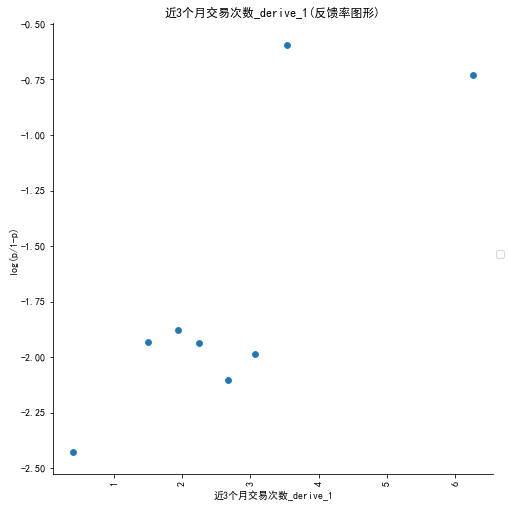

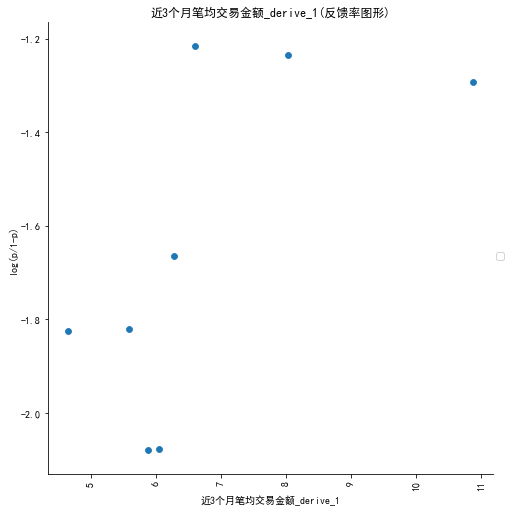

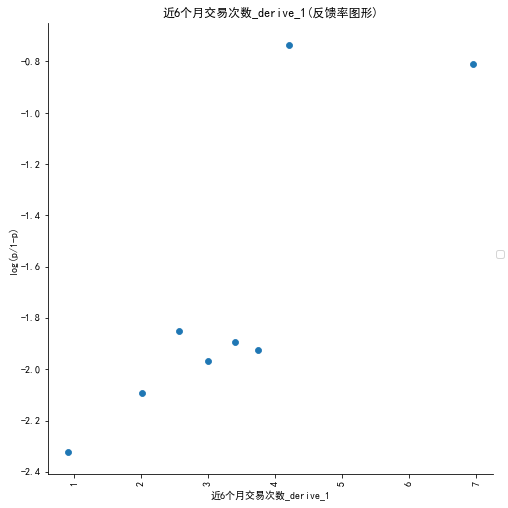

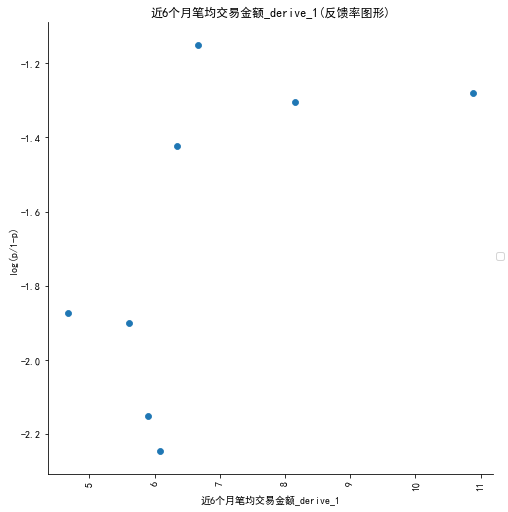

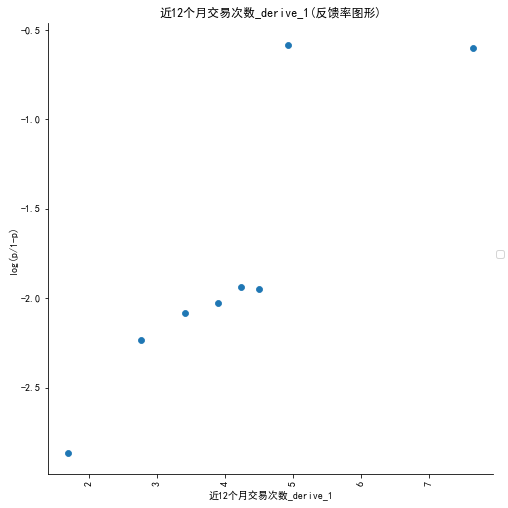

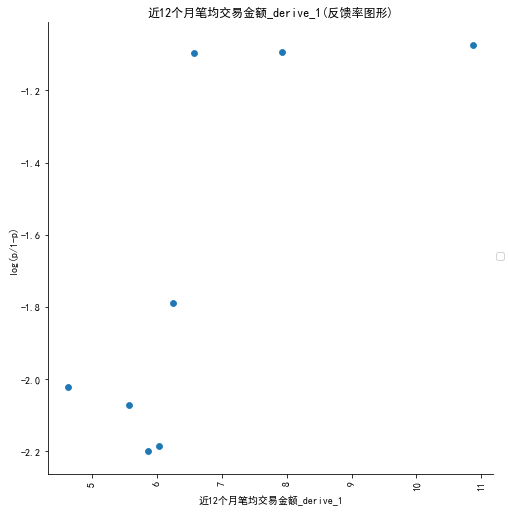

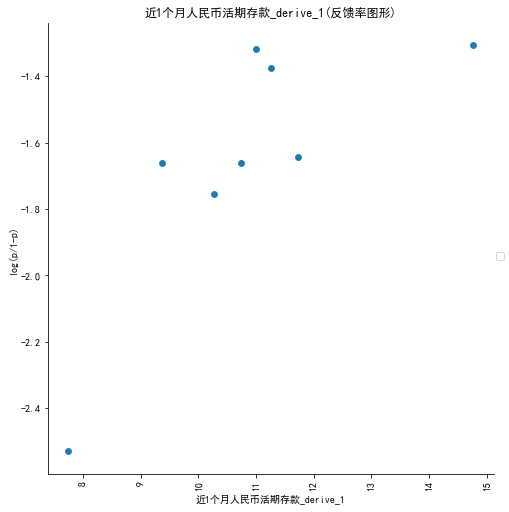

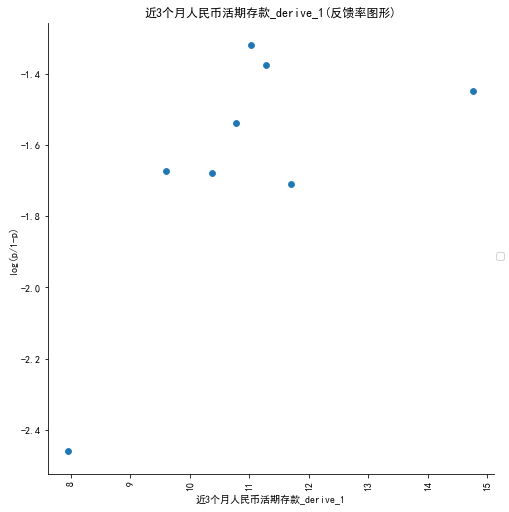

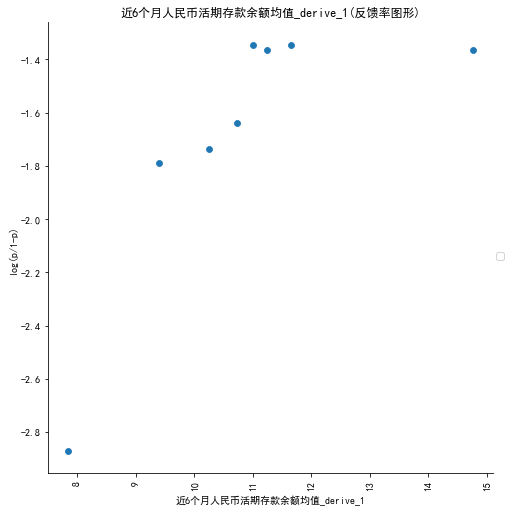

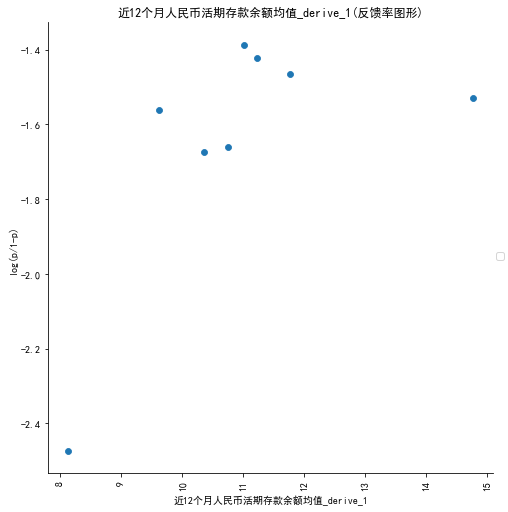

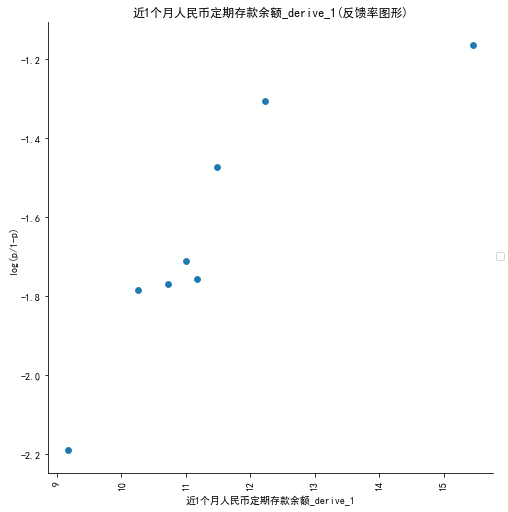

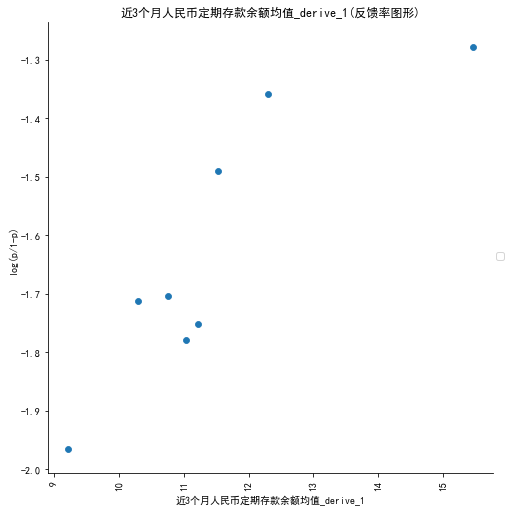

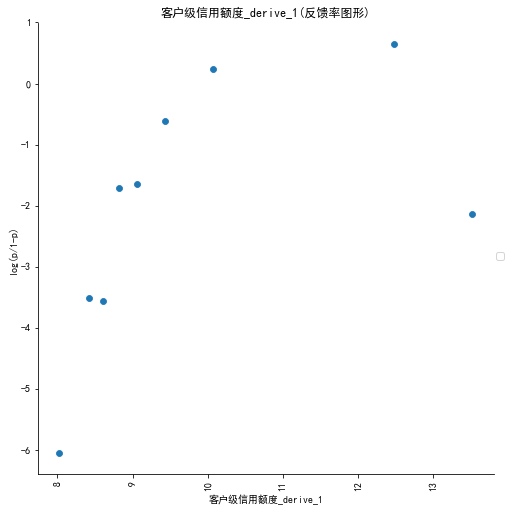

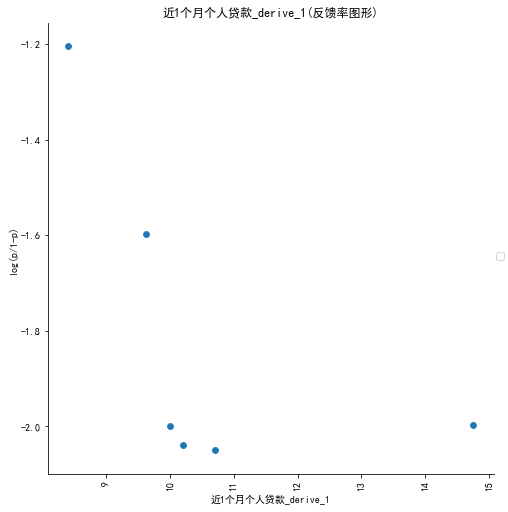

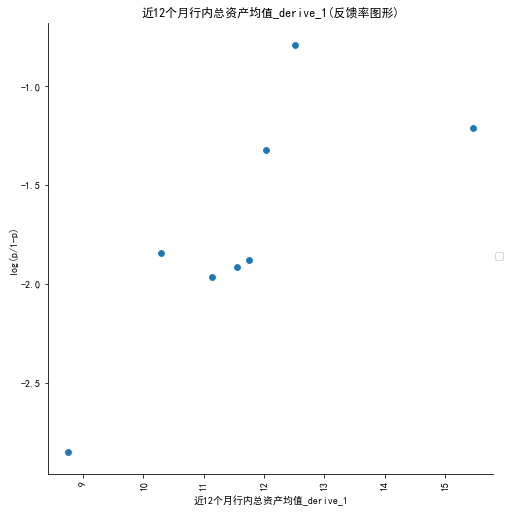

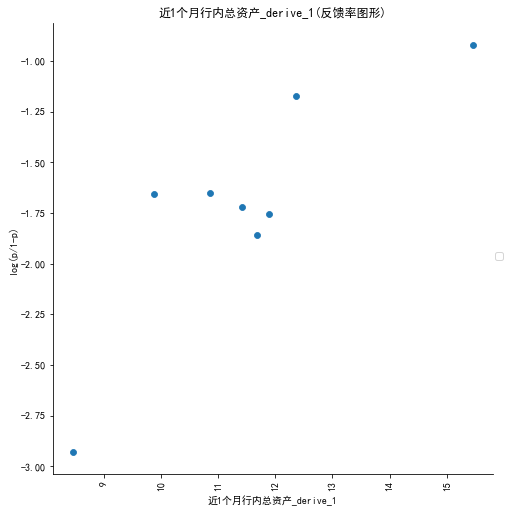

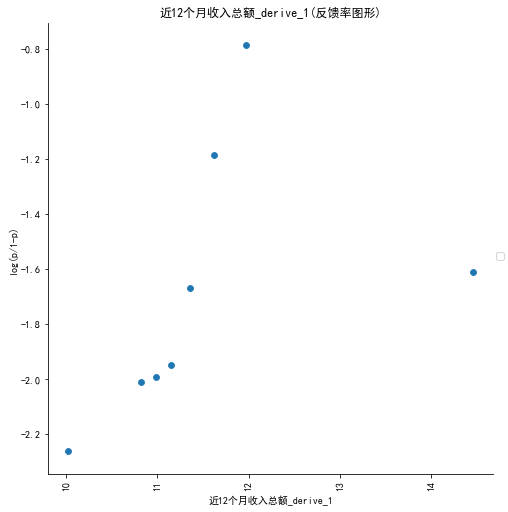

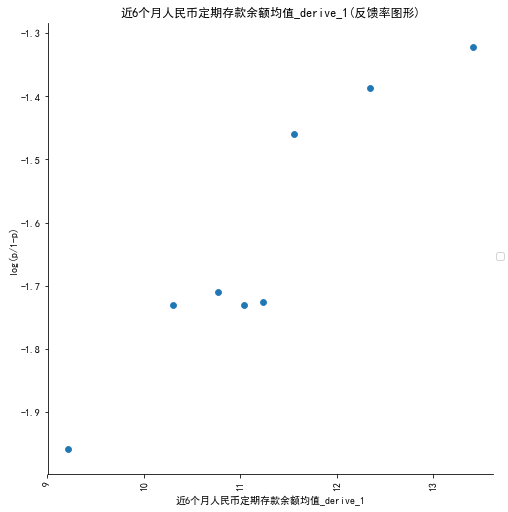

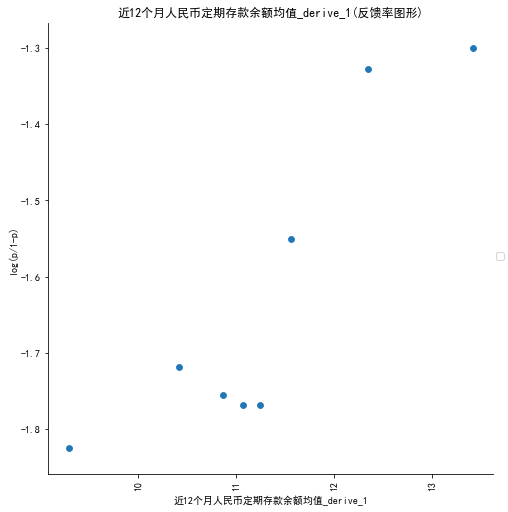

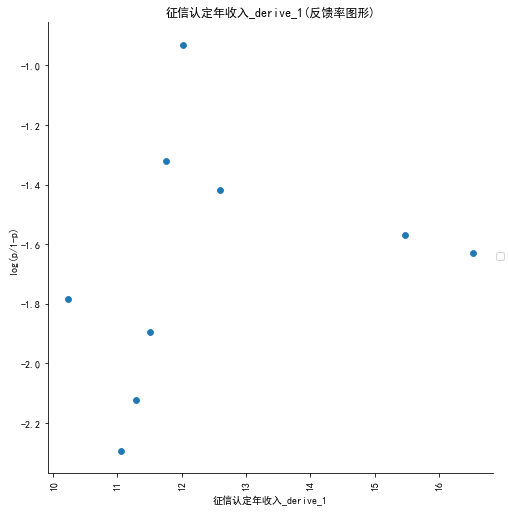

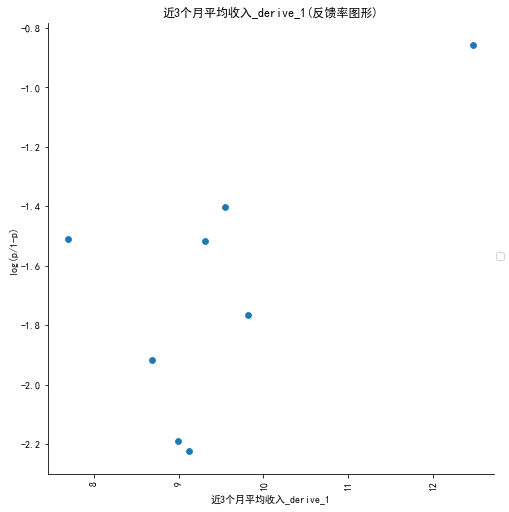

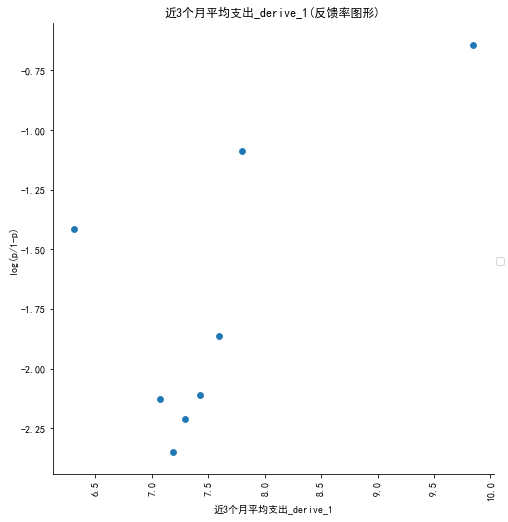

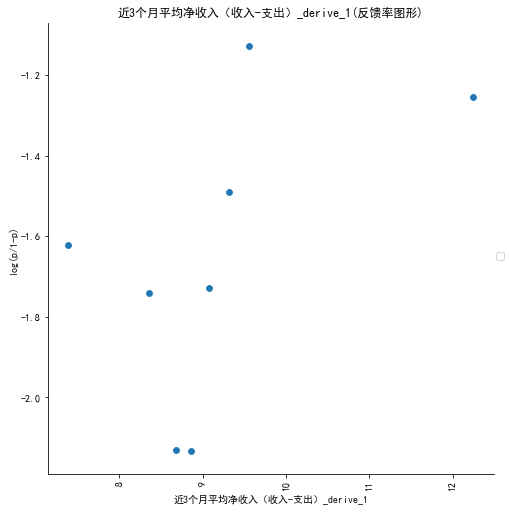

In [47]:
#解决中文显示问题
plt.rcParams["font.sans-serif"] = [u"SimHei"]
#解决图中负号问题
plt.rcParams['axes.unicode_minus']=False
for ContinuousColumn in interval_list:
    if  ContinuousColumn != '年龄_derive_1':
        #print(columnvaluecount_dict[ContinuousColumn]['TurnSampleLogPercentRadio'])
        ContinuousSampleLogPercentRadio=pd.DataFrame(columnvaluecount_dict[ContinuousColumn]['TurnSampleLogPercentRadio'])
        #print(ContinuousSampleLogPercentRadio.sort_values(by=ContinuousColumn,ascending=False).iloc[1])
        print(ContinuousColumn,ContinuousSampleLogPercentRadio)

        ContinuousSampleLogPercentRadio.replace(float('inf'),ContinuousSampleLogPercentRadio.sort_values(by=ContinuousColumn,ascending=False).iloc[1],inplace=True)
        ContinuousSampleLogPercentRadio['X_value']=np.log(ContinuousSampleLogPercentRadio.index) #进行对数变换
      #  ContinuousSampleLogPercentRadio['X_value']=(ContinuousSampleLogPercentRadio.index)
        #print(ContinuousSampleLogPercentRadio,ContinuousSampleLogPercentRadio.columns)
        g = sns.FacetGrid(ContinuousSampleLogPercentRadio,palette="Set1", size=7)
     #   g.set(xlim = (0,10))
      #  g.set(ylim = (-3.2, -1.6))
        g.map(plt.scatter,'X_value', ContinuousColumn,linewidth=.8)

        g.set_xticklabels(rotation=90)
        g.set_axis_labels(ContinuousColumn, "log(p/1-p)");    
        plt.title(ContinuousColumn+u'(反馈率图形)')
        g.add_legend()
     #   g.savefig('万达信用分模型连续型变量反馈率图像\\'+ContinuousColumn+u'(反馈率图形).png',dpi=100)

年龄_derive_1          年龄_derive_1
21.9995    -2.464083
27.5000    -2.121872
30.0000    -2.088096
32.5000    -2.143057
35.5000    -1.338291
39.0000    -1.039420
43.0000    -1.056944
67.5000    -1.309107
近1个月交易次数_derive_1           近1个月交易次数_derive_1
0.4995            -2.178444
1.5000            -2.224816
2.5000            -2.140309
3.5000            -1.590365
6.0000            -1.440362
10.5000           -0.707686
156.5000          -0.740871
近1个月笔均交易金额_derive_1             近1个月笔均交易金额_derive_1
97.9995               -1.897601
250.5000              -1.872569
342.0000              -1.932296
417.0000              -1.980622
533.0000              -1.598893
748.0000              -1.178050
3513.5625             -1.297805
53070.5625            -1.394649
近3个月交易次数_derive_1           近3个月交易次数_derive_1
1.4995            -2.429122
4.5000            -1.931430
7.0000            -1.877142
9.5000            -1.936222
14.5000           -2.102191
21.5000           -1.987436
34.5000           -0.595387
522.000

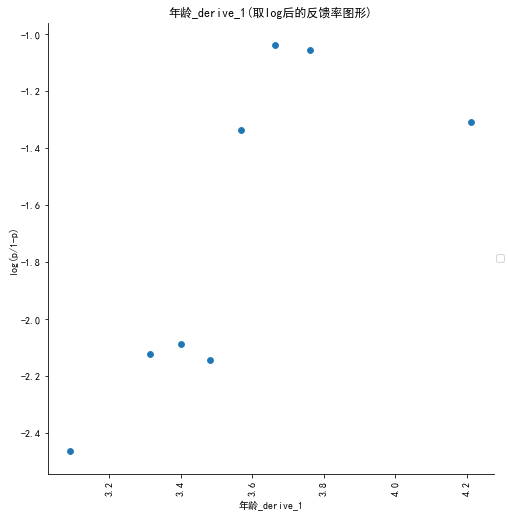

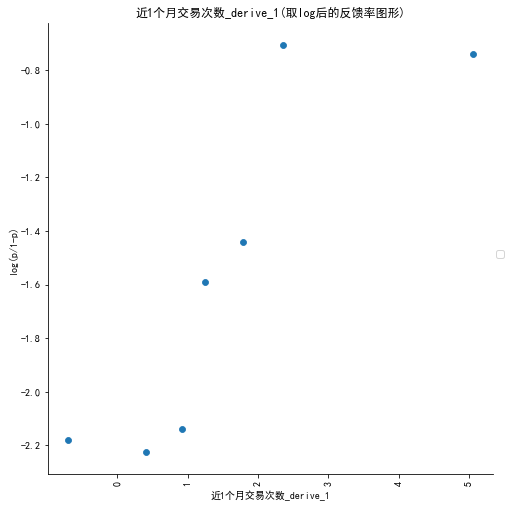

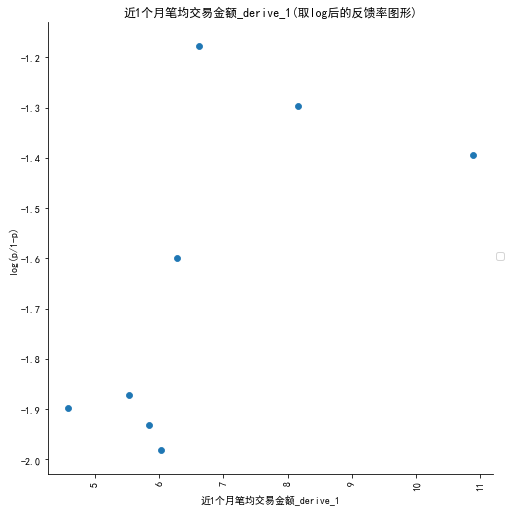

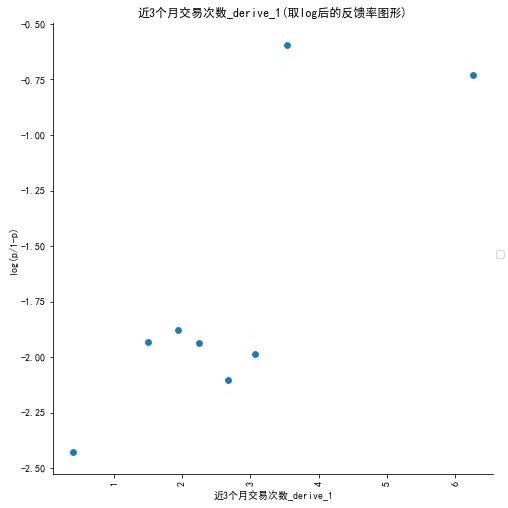

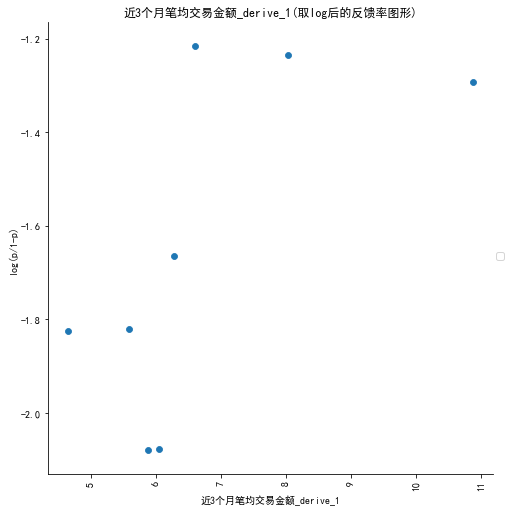

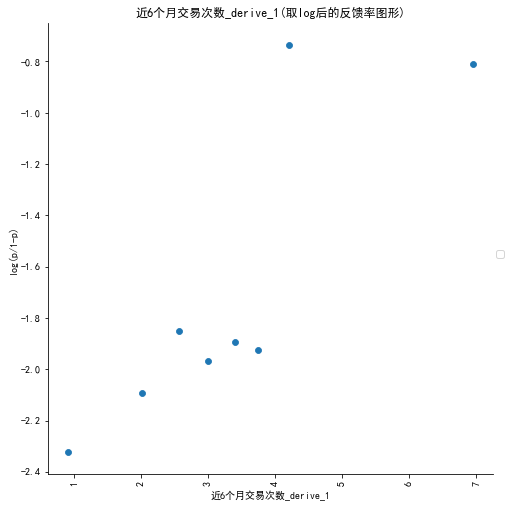

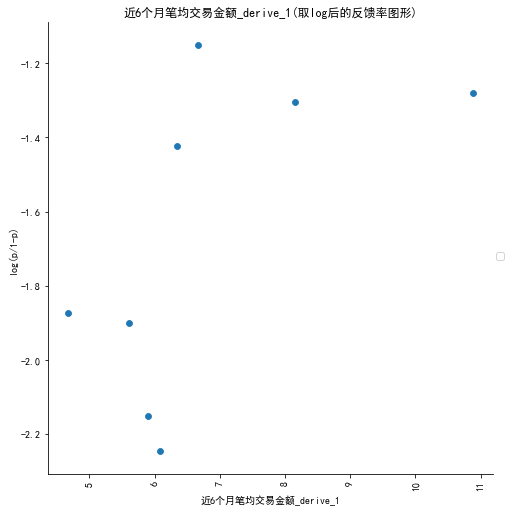

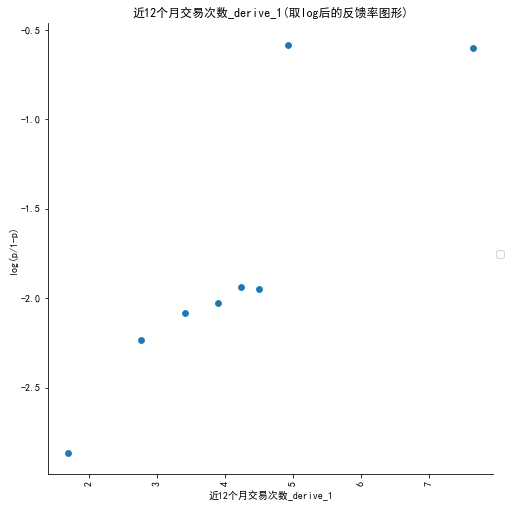

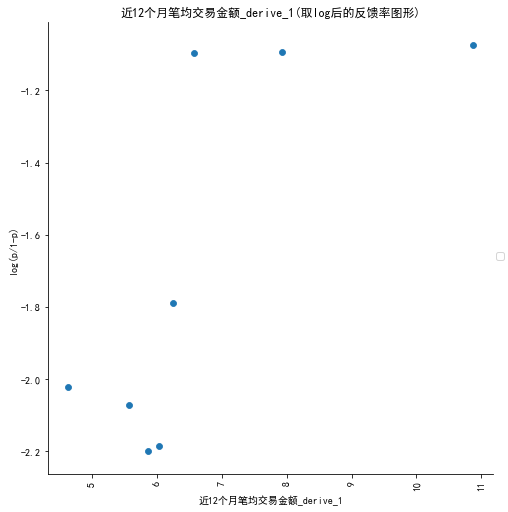

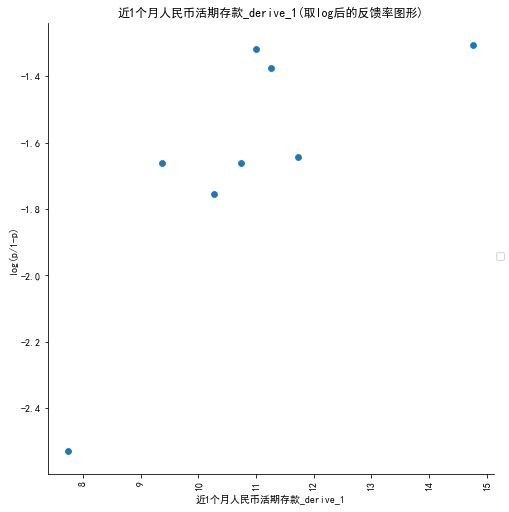

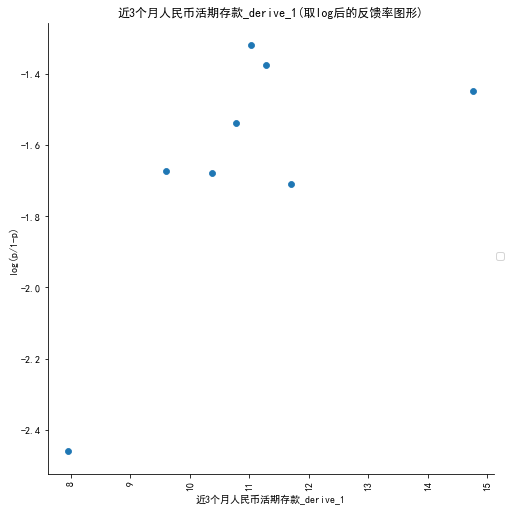

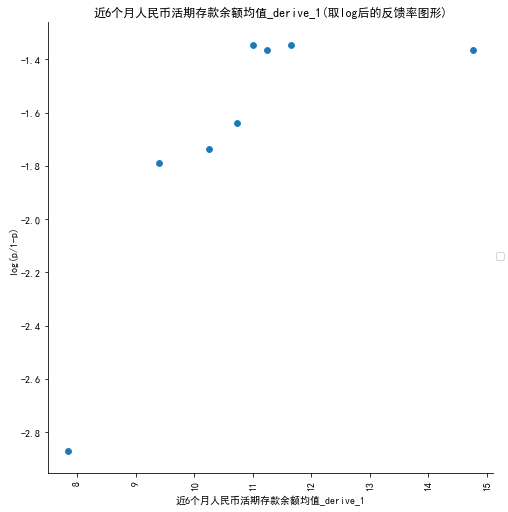

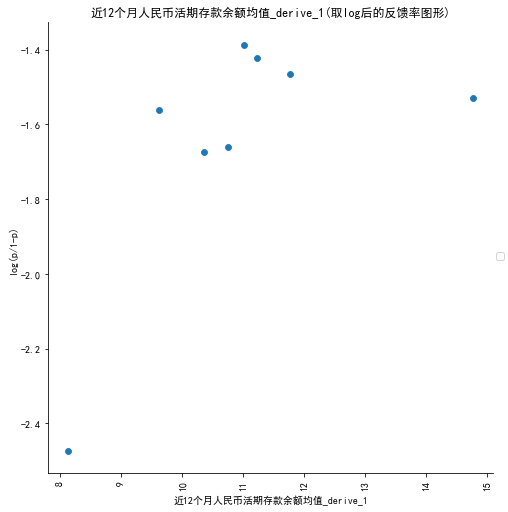

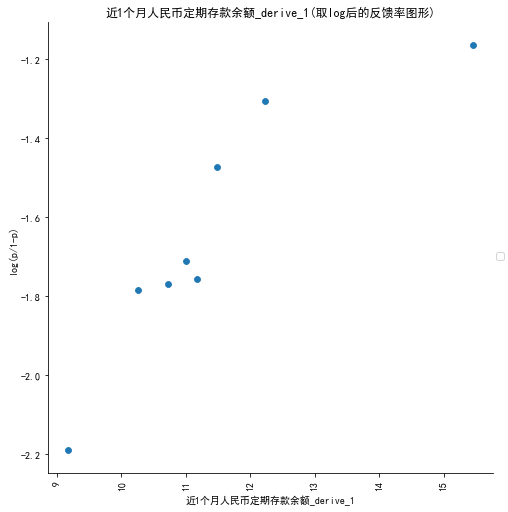

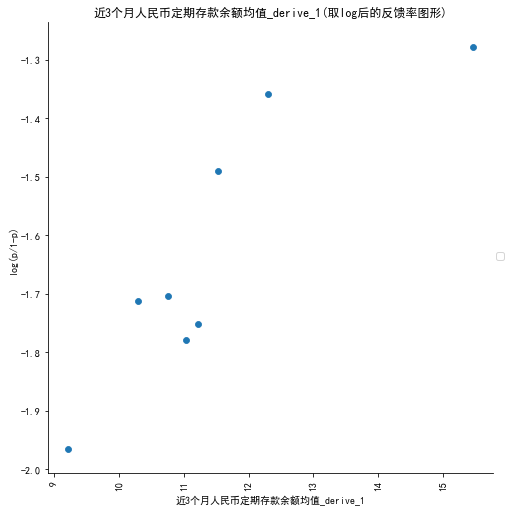

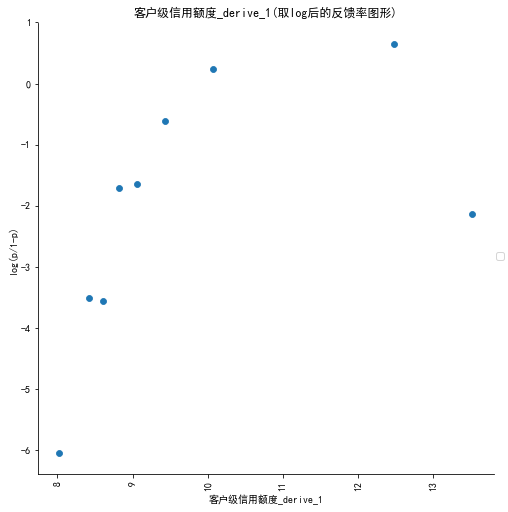

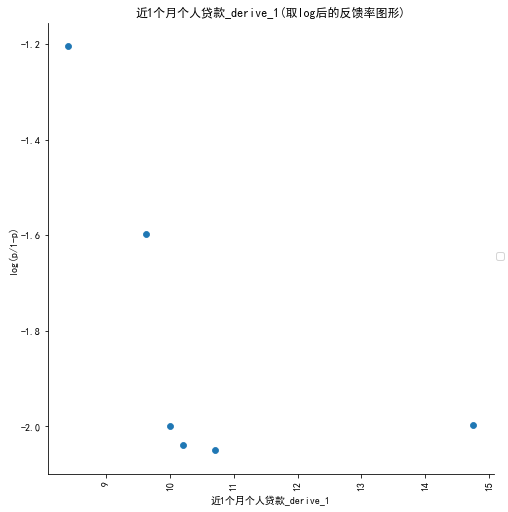

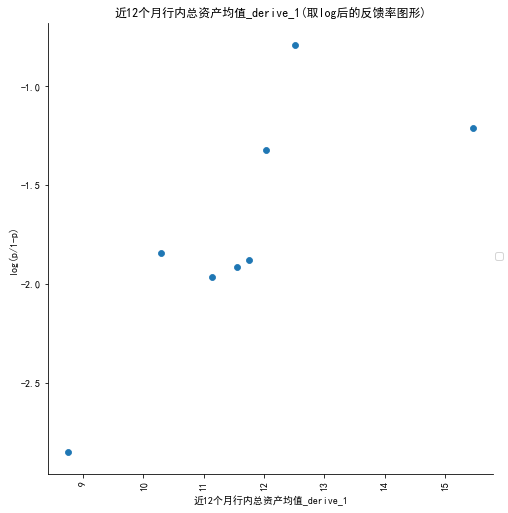

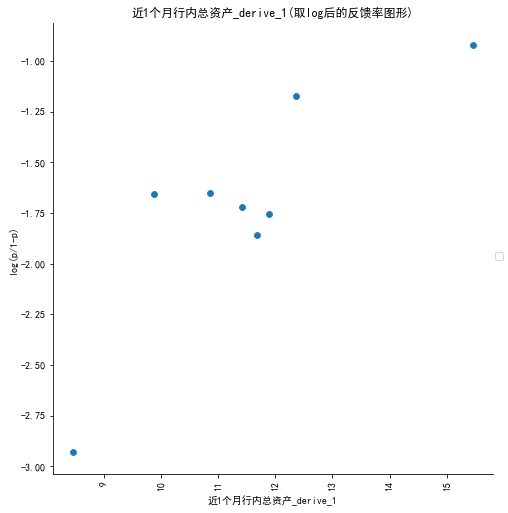

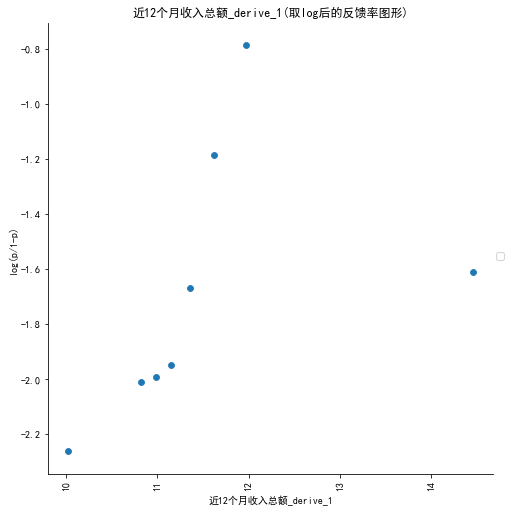

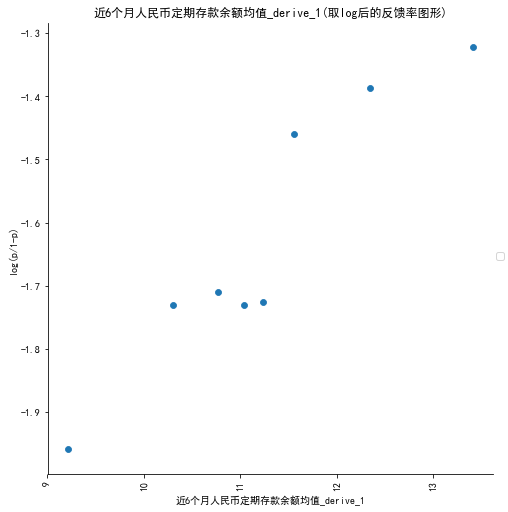

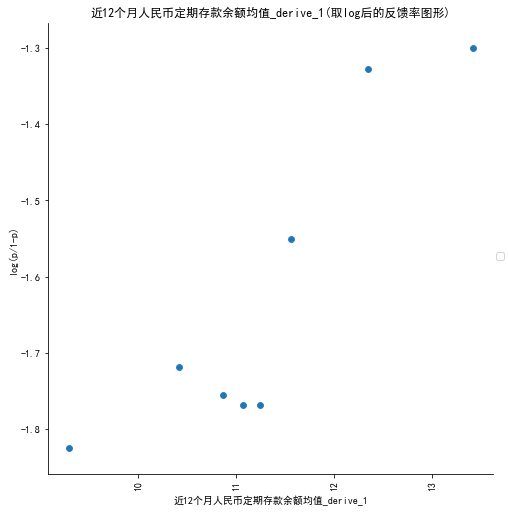

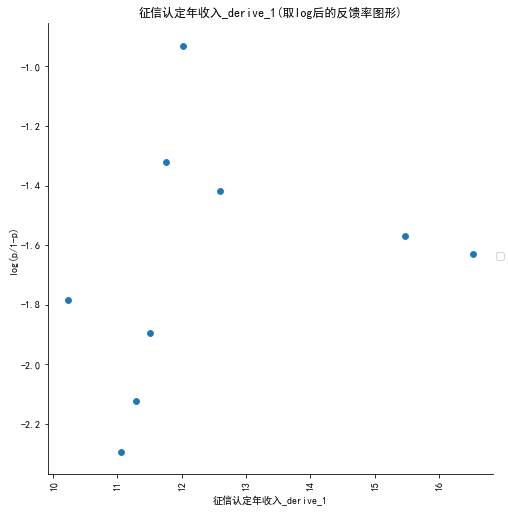

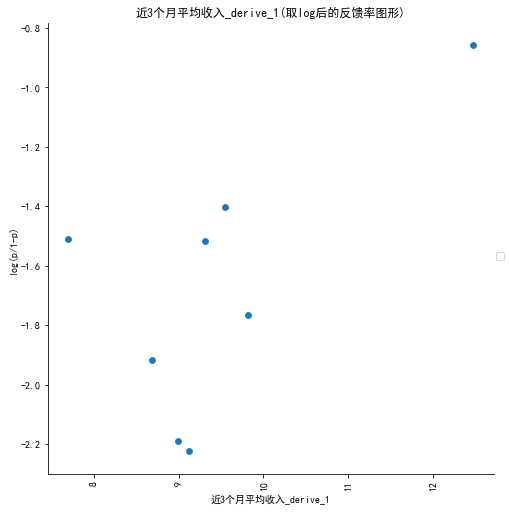

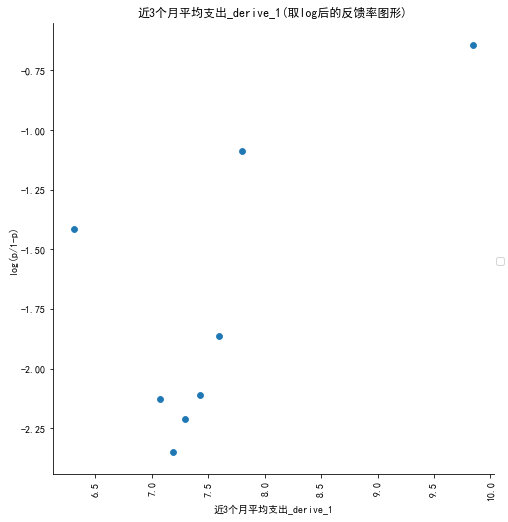

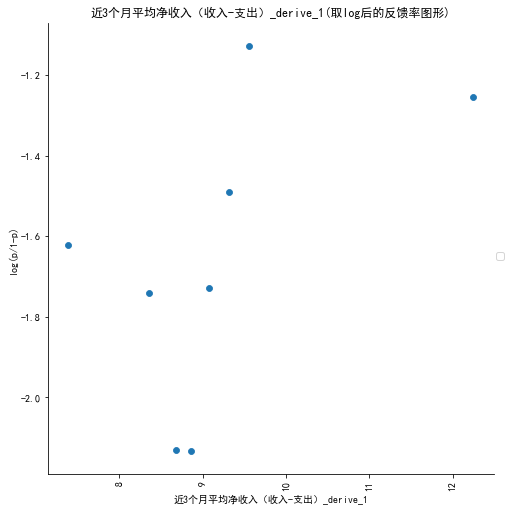

In [48]:
#解决中文显示问题
plt.rcParams["font.sans-serif"] = [u"SimHei"]
#解决图中负号问题
plt.rcParams['axes.unicode_minus']=False
for ContinuousColumn in interval_list:
    ContinuousSampleLogPercentRadio=pd.DataFrame(columnvaluecount_dict[ContinuousColumn]['TurnSampleLogPercentRadio'])
    #print(ContinuousSampleLogPercentRadio.sort_values(by=ContinuousColumn,ascending=False).iloc[1])
    print(ContinuousColumn,ContinuousSampleLogPercentRadio)
    
    ContinuousSampleLogPercentRadio.replace(float('inf'),ContinuousSampleLogPercentRadio.sort_values(by=ContinuousColumn,ascending=False).iloc[1],inplace=True)
    ContinuousSampleLogPercentRadio['X_value']=np.log(ContinuousSampleLogPercentRadio.index) #进行对数变换
  #  ContinuousSampleLogPercentRadio['X_value']=(ContinuousSampleLogPercentRadio.index)

    #print(ContinuousSampleLogPercentRadio,ContinuousSampleLogPercentRadio.columns)
    g = sns.FacetGrid(ContinuousSampleLogPercentRadio,palette="Set1", size=7)

    g.map(plt.scatter,'X_value', ContinuousColumn,linewidth=.8)
    
    g.set_xticklabels(rotation=90)
    g.set_axis_labels(ContinuousColumn, "log(p/1-p)");    
    plt.title(ContinuousColumn+u'(取log后的反馈率图形)')
    g.add_legend()
    g.savefig('广发信用卡模型连续型变量反馈率图像(高消费用户)\\'+ContinuousColumn+u'(反馈率图形).png',dpi=100)

In [49]:
#以下为类别变量：
# 性别 社会保障
# '婚姻状况' 分为三类：
xy_6['婚姻状况'][xy_6['婚姻状况'].isin(['M','W','S'])] = 'M'

# '学历' 分为三类：
xy_6['学历'][xy_6['学历'].isin([2,8,1,9,0])] = 0
xy_6['学历'][xy_6['学历'].isin([6, 5])] = 2
xy_6['学历'][xy_6['学历'].isin([7,4,3])] = 1

#'居住情况' 分为三类：
xy_6['居住情况'][xy_6['居住情况'].isin([1,2,7,3])] = 0
xy_6['居住情况'][xy_6['居住情况'].isin([5,6])] = 1
xy_6['居住情况'][xy_6['居住情况'].isin([4])] = 2

#'单位性质' 分为三类：
xy_6['单位性质'][xy_6['单位性质'].isin([0,2,4])] = 0
xy_6['单位性质'][xy_6['单位性质'].isin([5,8,1,11])] = 1
xy_6['单位性质'][xy_6['单位性质'].isin([7,6,3,9])] = 2


#'所属城市级别' 分为三类：
xy_6['所属城市级别'][xy_6['所属城市级别'].isin([1])] = 0
xy_6['所属城市级别'][xy_6['所属城市级别'].isin([2,3,4])] = 1
xy_6['所属城市级别'][xy_6['所属城市级别'].isin([7,6,5])] = 2

#'客户风险承受能力等级' 分为三类：
xy_6['客户风险承受能力等级'][xy_6['客户风险承受能力等级'].isin([2])] = 0
xy_6['客户风险承受能力等级'][xy_6['客户风险承受能力等级'].isin([3,1])] = 1
xy_6['客户风险承受能力等级'][xy_6['客户风险承受能力等级'].isin([4,5])] = 2
xy_6['客户级信用额度'][xy_6['客户级信用额度']==999999999]=6000


In [50]:
# 有明显的相关性的连续型变量：

#近1个月笔均交易金额_derive_1 年龄


# # 1.需要转换为类别变量的连续型变量
# xy_4['netlong'][xy_4['netlong'] <= 24 ] = 0
# xy_4['netlong'][xy_4['netlong'] > 54 ] = 0
# xy_4['netlong'][(xy_4['netlong'] > 42)&(xy_4['netlong'] <= 50)] = 0
# xy_4['netlong'][(xy_4['netlong'] > 24)&(xy_4['netlong'] <= 42)] = 1
# xy_4['netlong'][(xy_4['netlong'] > 50)&(xy_4['netlong'] <= 54)] = 1


# xy_4['listing_data_months'][xy_4['listing_data_months'] == 9999] = 1      
# xy_4['listing_data_months'][xy_4['listing_data_months'] <= 40] = 1 
# xy_4['listing_data_months'][(xy_4['listing_data_months'] > 40)&(xy_4['listing_data_months'] <= 88)] = 0 
    
# # 2.有明显线性关系，需要移动个别异常的点的连续型变量：    
# xy_4['listing_price'][xy_4['listing_price'] == 9999] = 2000     
# xy_4['arpu_avg'][(xy_4['arpu_avg'] > 289.09) &(xy_4['arpu_avg'] <= 500)]  = 50
# xy_4['arpu_avg'][(xy_4['arpu_avg'] == 9999)]  = -350 

# xy_4['credit_limit'][xy_4['credit_limit'] == 999999] = 593500
# # 根据反馈率对数几率比，显然 'credit_limit'变量的 log值 比原变量，线性关系更明显，所以模型里使用衍生变量'log_credit_limit'
# xy_4['log_credit_limit'] = np.log(xy_4['credit_limit'])

In [55]:
xy_6.columns

Index(['target', '性别', '婚姻状况', '学历', '居住情况', '社会保障', '单位性质', '所属城市级别',
       '客户风险承受能力等级', '年龄', '近1个月交易次数', '近1个月笔均交易金额', '近3个月交易次数', '近3个月笔均交易金额',
       '近6个月交易次数', '近6个月笔均交易金额', '近12个月交易次数', '近12个月笔均交易金额', '近1个月人民币活期存款',
       '近3个月人民币活期存款', '近6个月人民币活期存款余额均值', '近12个月人民币活期存款余额均值', '近1个月人民币定期存款余额',
       '近3个月人民币定期存款余额均值', '客户级信用额度', '近1个月个人贷款', '近12个月行内总资产均值', '近1个月行内总资产',
       '近12个月收入总额', '近6个月人民币定期存款余额均值', '近12个月人民币定期存款余额均值', '征信认定年收入',
       '近3个月平均收入', '近3个月平均支出', '近3个月平均净收入（收入-支出）'],
      dtype='object')

In [56]:
# 对模型的类别变量进行虚拟变量处理：onehot编码需要str格式
ClassifyColumnsList_to_model=[ '性别','婚姻状况','学历','居住情况','社会保障','单位性质','所属城市级别','客户风险承受能力等级']
for ClassifyColumn in ClassifyColumnsList_to_model:
    xy_6[ClassifyColumn]=xy_6[ClassifyColumn].astype('str')
    
#筛选放到模型里去跑的变量
# xy_5 = xy_6[[ 'target', '性别','婚姻状况','学历','居住情况','社会保障','单位性质','所属城市级别','客户风险承受能力等级', '年龄', '近1个月交易次数', '近1个月笔均交易金额' 
#             , '近1个月人民币定期存款余额', '客户级信用额度','近1个月个人贷款', '近1个月人民币活期存款', '近1个月行内总资产' ,
#             '近12个月收入总额']]

xy_5 = xy_6[['target', '性别', '婚姻状况', '学历', '居住情况', '社会保障', '单位性质', '所属城市级别',
       '客户风险承受能力等级', '年龄', '近1个月交易次数', '近1个月笔均交易金额', '近3个月交易次数', '近3个月笔均交易金额',
       '近6个月交易次数', '近6个月笔均交易金额', '近12个月交易次数', '近12个月笔均交易金额', '近1个月人民币活期存款',
       '近3个月人民币活期存款', '近6个月人民币活期存款余额均值', '近12个月人民币活期存款余额均值', '近1个月人民币定期存款余额',
       '近3个月人民币定期存款余额均值', '客户级信用额度', '近1个月个人贷款', '近12个月行内总资产均值', '近1个月行内总资产',
       '近12个月收入总额', '近6个月人民币定期存款余额均值', '近12个月人民币定期存款余额均值', '征信认定年收入',
       '近3个月平均收入', '近3个月平均支出', '近3个月平均净收入（收入-支出）']]

In [52]:
# '年龄', '近1个月交易次数', '近1个月笔均交易金额', '近3个月交易次数', '近3个月笔均交易金额', '近6个月交易次数',
#        '近6个月笔均交易金额', '近12个月交易次数', '近12个月笔均交易金额', '近1个月人民币活期存款', '近3个月人民币活期存款',
#        '近6个月人民币活期存款余额均值', '近12个月人民币活期存款余额均值', '近1个月人民币定期存款余额',
#        '近3个月人民币定期存款余额均值', '客户级信用额度', '近1个月个人贷款', '近12个月行内总资产均值', '近1个月行内总资产',
#        '近12个月收入总额', '近6个月人民币定期存款余额均值', '近12个月人民币定期存款余额均值', '征信认定年收入',
#        '近3个月平均收入', '近3个月平均支出', '近3个月平均净收入（收入-支出）'

In [57]:
xy_5_onehot = pd.get_dummies(xy_5, drop_first = True)
xy_5_onehot.columns

Index(['target', '年龄', '近1个月交易次数', '近1个月笔均交易金额', '近3个月交易次数', '近3个月笔均交易金额',
       '近6个月交易次数', '近6个月笔均交易金额', '近12个月交易次数', '近12个月笔均交易金额', '近1个月人民币活期存款',
       '近3个月人民币活期存款', '近6个月人民币活期存款余额均值', '近12个月人民币活期存款余额均值', '近1个月人民币定期存款余额',
       '近3个月人民币定期存款余额均值', '客户级信用额度', '近1个月个人贷款', '近12个月行内总资产均值', '近1个月行内总资产',
       '近12个月收入总额', '近6个月人民币定期存款余额均值', '近12个月人民币定期存款余额均值', '征信认定年收入',
       '近3个月平均收入', '近3个月平均支出', '近3个月平均净收入（收入-支出）', '性别_1', '婚姻状况_M', '婚姻状况_O',
       '学历_1', '学历_2', '居住情况_1', '居住情况_2', '社会保障_1', '单位性质_1', '单位性质_2',
       '所属城市级别_1', '所属城市级别_2', '客户风险承受能力等级_1', '客户风险承受能力等级_2'],
      dtype='object')

In [58]:
xy_5_onehot.to_excel('d:\\兴业独热编码.xlsx',index=None)

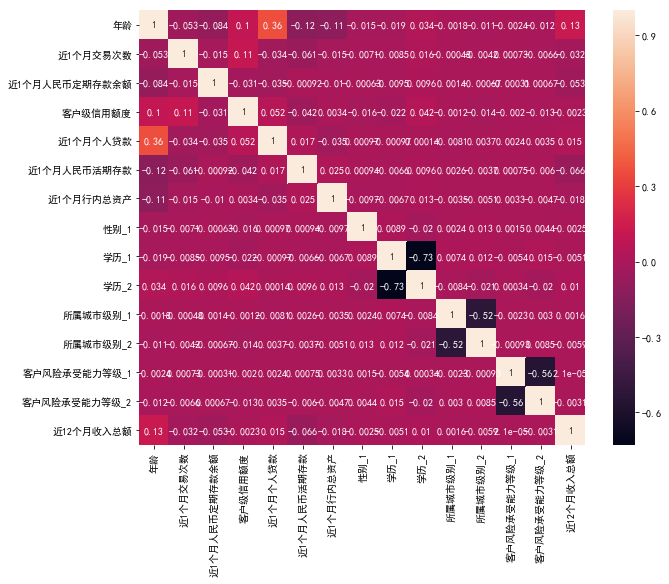

In [55]:
#  # 查看各变量相关性
x_variable = xy_5_onehot[[  '年龄', '近1个月交易次数', '近1个月人民币定期存款余额', '客户级信用额度',
       '近1个月个人贷款', '近1个月人民币活期存款', '近1个月行内总资产', '性别_1', '学历_1', '学历_2',
       '所属城市级别_1', '所属城市级别_2', '客户风险承受能力等级_1', '客户风险承受能力等级_2','近12个月收入总额']]
x_variable_corr = x_variable.corr()
plt.figure(figsize = (10,8))
sns.heatmap(x_variable_corr,annot=True)

In [56]:
# #对数据的训练集进行zscore标准化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_llx = xy_5_onehot[[ '年龄', '近1个月交易次数', '近1个月人民币定期存款余额', '客户级信用额度',
       '近1个月个人贷款', '近1个月人民币活期存款', '近1个月行内总资产', '性别_1', '学历_1', '学历_2',
       '所属城市级别_1', '所属城市级别_2', '客户风险承受能力等级_1', '客户风险承受能力等级_2','近12个月收入总额']]
X_StandardScaler = ss.fit(df_llx)
df_x_standard=X_StandardScaler.transform(df_llx)
df_x_standard_df = pd.DataFrame(data = df_x_standard,columns = [ '年龄', '近1个月交易次数',  '近1个月人民币定期存款余额', '客户级信用额度',
       '近1个月个人贷款', '近1个月人民币活期存款', '近1个月行内总资产', '性别_1', '学历_1', '学历_2',
       '所属城市级别_1', '所属城市级别_2', '客户风险承受能力等级_1', '客户风险承受能力等级_2','近12个月收入总额'])
df_x_standard_df.reset_index(drop = True,inplace = True)
xy_5_onehot.reset_index(drop = True,inplace = True)

In [57]:
print(df_x_standard_df.head())

         年龄  近1个月交易次数  近1个月人民币定期存款余额   客户级信用额度  近1个月个人贷款  近1个月人民币活期存款  \
0 -0.056078 -0.072848      -0.233605  0.080265 -0.137885    -0.293970   
1 -0.056078  0.074230      -0.251659 -0.178497 -0.195786    -0.251072   
2  0.562802 -0.256695      -0.201627 -0.081432 -0.143111    -0.173606   
3 -0.159225 -0.293464      -0.128837 -0.178497 -0.125996    -0.299951   
4 -0.881252 -0.293464       0.614931  0.025524 -0.195786    -0.233129   

   近1个月行内总资产      性别_1      学历_1      学历_2  所属城市级别_1  所属城市级别_2  客户风险承受能力等级_1  \
0  -0.106410 -0.849831  0.774444 -0.564676  0.904314 -0.474214      0.906481   
1  -0.239015  1.176704 -1.291249 -0.564676  0.904314 -0.474214      0.906481   
2  -0.266196  1.176704  0.774444 -0.564676 -1.105810 -0.474214      0.906481   
3  -0.147509 -0.849831 -1.291249  1.770929 -1.105810 -0.474214     -1.103166   
4  -0.267168 -0.849831  0.774444 -0.564676 -1.105810 -0.474214      0.906481   

   客户风险承受能力等级_2  近12个月收入总额  
0     -0.506502   0.965400  
1     -0.506502  -0.28

In [58]:
xy_5_onehot['target'].index

RangeIndex(start=0, stop=108000, step=1)

In [59]:
df_x_standard_df.index

RangeIndex(start=0, stop=108000, step=1)

Optimization terminated successfully.
         Current function value: 0.449492
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.449516
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.444478
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.440012
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.449355
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.445082
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.442594
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.428106
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.436895
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.444672
  

Optimization terminated successfully.
         Current function value: 0.401602
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401185
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399220
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.400654
         Iterations 7
Add  客户风险承受能力等级_2                   with p-value 6.78096e-189
Add Column: ['年龄', '学历_1', '学历_2', '客户级信用额度', '所属城市级别_2', '客户风险承受能力等级_2']
Optimization terminated successfully.
         Current function value: 0.397272
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.395302
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.395595
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.396823
         Iterations 7
Optimization terminated successfully.
         C

Optimization terminated successfully.
         Current function value: 0.381849
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.151     
Dependent Variable: target           AIC:              82511.3491
Date:               2020-01-09 19:09 BIC:              82664.7872
No. Observations:   108000           Log-Likelihood:   -41240.   
Df Model:           15               LL-Null:          -48548.   
Df Residuals:       107984           LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                 Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const           -1.9206   0.0104 -185.1841 0.0000 -1.9409 -1.9003
年龄               0.4516   0.0094   48.0327 0.0000  0.4332  0.4700


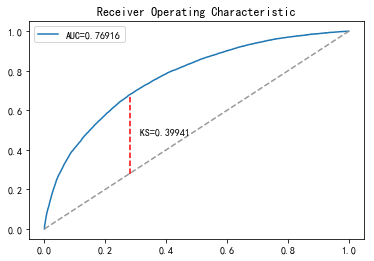

In [69]:
df_y = xy_5_onehot['target']       
# df_x = xy_5_onehot[[ 'listing_price', 'arpu_avg', 'log_credit_limit',
#        'card_type_1.0', 'card_type_9999.0',  'brand_2', 'brand_3',
#        'brand_4', 'user_level_0.0', 'user_level_1.0', 'user_level_6.0',
#        'sex_0.0', 'sex_1.0', 'sex_9999.0', 'family_client_1.0',
#        'family_client_9999.0', 'adis_1.0', 'adis_9999.0', 'international_1.0',
#        'international_9999.0', 'core_amt_1.0', 'core_amt_2.0',
#        'core_amt_9999.0', 'owner_city_level_1.0', 'owner_city_level_2',
#        'owner_city_level_3', 'netlong_0.0', 'netlong_1.0',
#        'listing_data_months_0', 'listing_data_months_1']]    

# 用以上标签去跑时，模型出现奇异矩阵问题。考虑到很可能是当放进模型的标签太多时，模型较容易出现奇异矩阵问题
# 结合标签的不同类别间反馈率的差异，以及标签的覆盖规模（缺失值比例），在 'sex',  'adis', 'international', 'family_client'去掉
# 'international', 'family_client'这两个标签，然后重跑模型，如下：

df_x = df_x_standard_df  

X_train = df_x
Y_train = df_y

train_item_number=0

def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01,     
                       threshold_out = 0.02, 
                       verbose = True):
    global train_item_number
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                print('Add Column:',included)
        # backward step
        model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
                print('Drop Column:',included)
        train_item_number+=1  # 迭代次数···        
        if not changed:
            break
    return included
 
result = stepwise_selection(X_train, Y_train)#模板改这里的参数X_train, Y_train
 
print('resulting features:')
print(result)

lr = sm.Logit(Y_train,sm.add_constant(X_train[result]))
rst = lr.fit()
print(rst.summary2())

y_predicted = rst.predict(sm.add_constant(X_train[result]))

fpr, tpr, thresholds = roc_curve(Y_train,y_predicted, pos_label=1)
auc_score = auc(fpr,tpr)
w = tpr - fpr
ks_score = w.max()
ks_x = fpr[w.argmax()]
ks_y = tpr[w.argmax()]
fig,ax = plt.subplots()
ax.plot(fpr,tpr,label='AUC=%.5f'%auc_score)
ax.set_title('Receiver Operating Characteristic')
ax.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
ax.plot([ks_x,ks_x], [ks_x,ks_y], '--', color='red')
ax.text(ks_x,(ks_x+ks_y)/2,'  KS=%.5f'%ks_score)
ax.legend()
fig.show() 

print('模型迭代次数：',train_item_number)

In [63]:
print(rst.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.151     
Dependent Variable: target           AIC:              82511.3491
Date:               2020-01-09 17:46 BIC:              82664.7872
No. Observations:   108000           Log-Likelihood:   -41240.   
Df Model:           15               LL-Null:          -48548.   
Df Residuals:       107984           LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                 Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const           -1.9206   0.0104 -185.1841 0.0000 -1.9409 -1.9003
年龄               0.4516   0.0094   48.0327 0.0000  0.4332  0.4700
学历_1             0.3709   0.0178   20.7837 0.0000  0.3359  0.4059
学历_2             0.7915   0.0162   4

In [126]:
result = [ '居住情况_2', '年龄', '居住情况_0', '所属城市级别_2', '客户风险承受能力等级_2', '性别_1', '近1个月交易次数', '客户风险承受能力等级_0', '所属城市级别_1']

lr = sm.Logit(Y_train,sm.add_constant(X_train[result]))
rst = lr.fit()
print(rst.summary2())

y_predicted = rst.predict(sm.add_constant(X_train[result]))

fpr, tpr, thresholds = roc_curve(Y_train,y_predicted, pos_label=1)
auc_score = auc(fpr,tpr)
w = tpr - fpr
ks_score = w.max()
ks_x = fpr[w.argmax()]
ks_y = tpr[w.argmax()]
fig,ax = plt.subplots()
ax.plot(fpr,tpr,label='AUC=%.5f'%auc_score)
ax.set_title('Receiver Operating Characteristic')
ax.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
ax.plot([ks_x,ks_x], [ks_x,ks_y], '--', color='red')
ax.text(ks_x,(ks_x+ks_y)/2,'  KS=%.5f'%ks_score)
ax.legend()
fig.show()  

KeyError: "['居住情况_2' '居住情况_0' '客户风险承受能力等级_0'] not in index"

In [ ]:
#print ('y_predicted = ', y_predicted)
sorted(y_predicted, reverse  = True)[600]

In [ ]:
sorted(y_predicted[Y_train == 0])[30000]

In [ ]:
#st.params

In [18]:
Y_train_predict_true=y_predicted.tolist()

# 训练集的十等分表：
IndexSeriers=pd.Series(np.arange(0,10,1))

Result_KS_10_Dic={'Train_KS_10':{},'Test_KS_10':{}}
Result_KS_10_Dic['Train_KS_10']['y_train']=Y_train
#Result_KS_10_Dic['Train_KS_10']['y_train_predict']=Y_train_predict
Result_KS_10_Dic['Train_KS_10']['y_train_true_proba']=Y_train_predict_true
Train_KS_10_df=pd.DataFrame(Result_KS_10_Dic['Train_KS_10'])

# 对概率值进行降序排列：
Train_KS_10_df.sort_values('y_train_true_proba',ascending=False,inplace=True)
Train_KS_10_df.reset_index(inplace=True)
Train_KS_10_df['true_proba_cluster']=pd.qcut(Train_KS_10_df.y_train_true_proba,10)
Result_KS_10_Dic['KS_10_cluster_crowd_number']=pd.DataFrame(Train_KS_10_df.true_proba_cluster.value_counts().sort_index(ascending=False))
Result_KS_10_Dic['KS_10_cluster_crowd_number'].reset_index(inplace=True)
Result_KS_10_Dic['KS_10_cluster_crowd_number']=pd.concat([Result_KS_10_Dic['KS_10_cluster_crowd_number'],IndexSeriers],axis=1)
display(Result_KS_10_Dic['KS_10_cluster_crowd_number'])

,index,true_proba_cluster,0
0,"(0.407, 0.891]",10796,0
1,"(0.31, 0.407]",10804,1
2,"(0.232, 0.31]",10797,2
3,"(0.159, 0.232]",10768,3
4,"(0.0931, 0.159]",10834,4
5,"(0.0612, 0.0931]",10790,5
6,"(0.044, 0.0612]",10715,6
7,"(0.0323, 0.044]",10889,7
8,"(0.022, 0.0323]",10796,8
9,"(0.0014099999999999998, 0.022]",10811,9


In [19]:
# 计算KS_10对应的分层映射值：
Result_KS_10_Dic['KS_10_cluster_map']={}
for index_number in range(len(Result_KS_10_Dic['KS_10_cluster_crowd_number'])):
    Result_KS_10_Dic['KS_10_cluster_map'][Result_KS_10_Dic['KS_10_cluster_crowd_number']['index'][index_number]]=index_number
display(Result_KS_10_Dic['KS_10_cluster_map'])

{Interval(0.407, 0.891, closed='right'): 0,
 Interval(0.31, 0.407, closed='right'): 1,
 Interval(0.232, 0.31, closed='right'): 2,
 Interval(0.159, 0.232, closed='right'): 3,
 Interval(0.0931, 0.159, closed='right'): 4,
 Interval(0.0612, 0.0931, closed='right'): 5,
 Interval(0.044, 0.0612, closed='right'): 6,
 Interval(0.0323, 0.044, closed='right'): 7,
 Interval(0.022, 0.0323, closed='right'): 8,
 Interval(0.0014099999999999998, 0.022, closed='right'): 9}

In [20]:
Train_KS_10_df['true_proba_cluster_map']=Train_KS_10_df['true_proba_cluster'].replace(Result_KS_10_Dic['KS_10_cluster_map'])
Train_KS_10_df_groupby_true_proba_cluster_map=Train_KS_10_df.groupby('true_proba_cluster_map')
Result_KS_10_Dic['KS_10_TPV_Number']={}
for proba_cluster_map,proba_cluster_value_df in Train_KS_10_df_groupby_true_proba_cluster_map:
    Result_KS_10_Dic['KS_10_TPV_Number'][proba_cluster_map]=(Train_KS_10_df_groupby_true_proba_cluster_map.get_group(proba_cluster_map)['y_train']==1).sum()
Result_KS_10_Dic['Real_True_Sample_number']=pd.Series(Result_KS_10_Dic['KS_10_TPV_Number'])
Result_KS_10_Dic['Real_True_Sample_number_rate3']=Result_KS_10_Dic['Real_True_Sample_number']/Result_KS_10_Dic['KS_10_cluster_crowd_number']['true_proba_cluster']
Result_KS_10_Dic['Real_True_Sample_number_rate4']=pd.Series(Result_KS_10_Dic['Real_True_Sample_number']/np.array(list(Result_KS_10_Dic['KS_10_TPV_Number'].values())).sum())

In [21]:
Result_KS_10_Statistics_df=pd.concat([Result_KS_10_Dic['KS_10_cluster_crowd_number']['true_proba_cluster'],Result_KS_10_Dic['Real_True_Sample_number'],Result_KS_10_Dic['Real_True_Sample_number_rate3'],Result_KS_10_Dic['Real_True_Sample_number_rate4']],axis=1)
Result_KS_10_Statistics_df.columns=['CustomNumber','True_Sample_CustomNumber','Real_True_Sample_number_rate3','Real_True_Sample_number_rate4']
Result_KS_10_Statistics_df['Real_True_Sample_number_rate4_accumulate']=Result_KS_10_Statistics_df['Real_True_Sample_number_rate4'].cumsum()
Result_KS_10_Statistics_df['Real_True_Sample_number_rate_random']=np.linspace(0,Result_KS_10_Statistics_df['Real_True_Sample_number_rate4_accumulate'].max(),10)
Result_KS_10_Statistics_df['ModelAcquireVaue']=Result_KS_10_Statistics_df['Real_True_Sample_number_rate4_accumulate']-Result_KS_10_Statistics_df['Real_True_Sample_number_rate_random']


In [22]:
Result_KS_10_Dic['KS_Point']={'x_point':Result_KS_10_Statistics_df['ModelAcquireVaue'].idxmax(),'y_point':Result_KS_10_Statistics_df['Real_True_Sample_number_rate4_accumulate'][Result_KS_10_Statistics_df['ModelAcquireVaue'].idxmax()]}
display(Result_KS_10_Dic['KS_Point'])

{'x_point': 2, 'y_point': 0.6955939765755716}

In [23]:
display(Result_KS_10_Statistics_df)

,CustomNumber,True_Sample_CustomNumber,Real_True_Sample_number_rate3,Real_True_Sample_number_rate4,Real_True_Sample_number_rate4_accumulate,Real_True_Sample_number_rate_random,ModelAcquireVaue
0,10796,5470,0.506669,0.305075,0.305075,0.000000,0.305075
1,10804,4040,0.373936,0.225321,0.530396,0.111111,0.419285
2,10797,2962,0.274335,0.165198,0.695594,0.222222,0.473372
3,10768,1924,0.178678,0.107306,0.802900,0.333333,0.469567
4,10834,1214,0.112055,0.067708,0.870608,0.444444,0.426163
5,10790,885,0.082020,0.049359,0.919967,0.555556,0.364411
6,10715,630,0.058796,0.035137,0.955103,0.666667,0.288437
7,10889,420,0.038571,0.023424,0.978528,0.777778,0.200750
8,10796,237,0.021953,0.013218,0.991746,0.888889,0.102857
9,10811,148,0.013690,0.008254,1.000000,1.000000,0.000000


In [ ]:
y_test_predicted = rst.predict(sm.add_constant(X_test[result]))

fpr_test, tpr_test, thresholds_test = roc_curve(Y_test,y_test_predicted, pos_label=1)
auc_score_test = auc(fpr_test,tpr_test)
w_test= tpr_test - fpr_test
ks_score_test = w_test.max()
ks_x_test = fpr_test[w_test.argmax()]
ks_y_test = tpr_test[w_test.argmax()]
fig,ax = plt.subplots()
ax.plot(fpr_test,tpr_test,label='AUC=%.5f'%auc_score_test)
ax.set_title('Receiver Operating Characteristic')
ax.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
ax.plot([ks_x_test,ks_x_test], [ks_x_test,ks_y_test], '--', color='red')
ax.text(ks_x_test,(ks_x_test+ks_y_test)/2,'  KS=%.5f'%ks_score_test)
ax.legend()
fig.show()  

In [ ]:
Y_test_predict_true=y_test_predicted.tolist()

# 测试集的十等分表：
Result_KS_10_Dic['Test_KS_10']['y_test']=Y_test
Result_KS_10_Dic['Test_KS_10']['y_test_predict']=Y_test_predict
Result_KS_10_Dic['Test_KS_10']['y_test_true_proba']=Y_test_predict_true
Test_KS_10_df=pd.DataFrame(Result_KS_10_Dic['Test_KS_10'])
display(Train_KS_10_df.head(),len(Train_KS_10_df),Test_KS_10_df.head(),len(Test_KS_10_df))


# 对测试值进行降序排列：
Test_KS_10_df.sort_values('y_test_true_proba',ascending=False,inplace=True)
Test_KS_10_df.reset_index(inplace=True)
Test_KS_10_df['true_proba_cluster']=pd.qcut(Test_KS_10_df.y_test_true_proba,10)
Result_KS_10_Dic['Test_KS_10_cluster_crowd_number']=pd.DataFrame(Test_KS_10_df.true_proba_cluster.value_counts().sort_index(ascending=False))
Result_KS_10_Dic['Test_KS_10_cluster_crowd_number'].reset_index(inplace=True)
Result_KS_10_Dic['Test_KS_10_cluster_crowd_number']=pd.concat([Result_KS_10_Dic['Test_KS_10_cluster_crowd_number'],IndexSeriers],axis=1)
display(Result_KS_10_Dic['Test_KS_10_cluster_crowd_number'])

In [ ]:
# 计算KS_10对应的分层映射值：
Result_KS_10_Dic['Test_KS_10_cluster_map']={}
for index_number in range(len(Result_KS_10_Dic['Test_KS_10_cluster_crowd_number'])):
    Result_KS_10_Dic['Test_KS_10_cluster_map'][Result_KS_10_Dic['Test_KS_10_cluster_crowd_number']['index'][index_number]]=index_number
display(Result_KS_10_Dic['Test_KS_10_cluster_map'])

In [ ]:
Test_KS_10_df['true_proba_cluster_map']=Test_KS_10_df['true_proba_cluster'].replace(Result_KS_10_Dic['Test_KS_10_cluster_map'])
Test_KS_10_df_groupby_true_proba_cluster_map=Test_KS_10_df.groupby('true_proba_cluster_map')
Result_KS_10_Dic['Test_KS_10_TPV_Number']={}
for proba_cluster_map,proba_cluster_value_df in Test_KS_10_df_groupby_true_proba_cluster_map:
    Result_KS_10_Dic['Test_KS_10_TPV_Number'][proba_cluster_map]=(Test_KS_10_df_groupby_true_proba_cluster_map.get_group(proba_cluster_map)['y_test']==1).sum()

Result_KS_10_Dic['Test_Real_True_Sample_number']=pd.Series(Result_KS_10_Dic['Test_KS_10_TPV_Number'])
Result_KS_10_Dic['Test_Real_True_Sample_number_rate3']=Result_KS_10_Dic['Test_Real_True_Sample_number']/Result_KS_10_Dic['Test_KS_10_cluster_crowd_number']['true_proba_cluster']
Result_KS_10_Dic['Test_Real_True_Sample_number_rate4']=pd.Series(Result_KS_10_Dic['Test_Real_True_Sample_number']/np.array(list(Result_KS_10_Dic['Test_KS_10_TPV_Number'].values())).sum())


In [ ]:
Result_KS_10_Statistics_Test_df=pd.concat([Result_KS_10_Dic['Test_KS_10_cluster_crowd_number']['true_proba_cluster'],Result_KS_10_Dic['Test_Real_True_Sample_number'],Result_KS_10_Dic['Test_Real_True_Sample_number_rate3'],Result_KS_10_Dic['Test_Real_True_Sample_number_rate4']],axis=1)
Result_KS_10_Statistics_Test_df.columns=['Test_CustomNumber','Test_True_Sample_CustomNumber','Test_Real_True_Sample_number_rate3','Test_Real_True_Sample_number_rate4']
Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate4_accumulate']=Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate4'].cumsum()
Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate_random']=np.linspace(0,Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate4_accumulate'].max(),10)
Result_KS_10_Statistics_Test_df['Test_ModelAcquireVaue']=Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate4_accumulate']-Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate_random']


In [ ]:
Result_KS_10_Dic['Test_KS_Point']={'x_point':Result_KS_10_Statistics_Test_df['Test_ModelAcquireVaue'].idxmax(),'y_point':Result_KS_10_Statistics_Test_df['Test_Real_True_Sample_number_rate4_accumulate'][Result_KS_10_Statistics_Test_df['Test_ModelAcquireVaue'].idxmax()]}
display(Result_KS_10_Dic['Test_KS_Point'])

In [ ]:
display(Result_KS_10_Statistics_Test_df)